# Lending Club Case Study Through Exploratory Data Analysis

*Submitted by*
Vishnu Vardhan Gudla (Group Facilitator)

# Problem Statement

**Use Exploratory Data Analysis to understand how consumer attributes and loan attributes influence the tendency of default.**

## Business Objectives
 
**Identify Risky loan applicants to reduce credit loss using EDA**


**Understand the driving factors behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.** 



## Data Understanding
 
Loan Dataset comprises of Lending club loan data with various numerical and categorical features for all loans issued through the time period 2007 to 2011. 

# 1. Importing all the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore wanings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',150)

# 2. Importing data from the lending club loan dataset csv file

In [2]:
df=pd.read_csv(r"E:\upgrad\lending case study\loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 2.1 Understanding the data frame

In [3]:
df.shape

(39717, 111)

In [4]:
# columns of the loan dataset 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# checking the Datatype of each column
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# getting to understand statistical information of numerical variables
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
# Column description csv
df_des=pd.read_excel(r"E:\upgrad\lending case study\Data_Dictionary.xlsx",index_col=0, header=None)
df_des

,1
0,
LoanStatNew,Description
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
annual_inc_joint,The combined self-reported annual income provi...
application_type,Indicates whether the loan is an individual ap...
avg_cur_bal,Average current balance of all accounts


In [9]:
# removing header row and last 2 rows, which have no importance
df_des=df_des.iloc[1:116,:]

In [10]:
# Creating loan dataset Column description dictionary 
#for understanding the description of column by checking through the dictionary
df_dict=df_des.to_dict(orient='dict')[1]
# printing the description of each column in the loan dataset
for key, values in df_dict.items():
    print(key, ': ', values,'\n')

acc_now_delinq :  The number of accounts on which the borrower is now delinquent. 

acc_open_past_24mths :  Number of trades opened in past 24 months. 

addr_state :  The state provided by the borrower in the loan application 

all_util :  Balance to credit limit on all trades 

annual_inc :  The self-reported annual income provided by the borrower during registration. 

annual_inc_joint :  The combined self-reported annual income provided by the co-borrowers during registration 

application_type :  Indicates whether the loan is an individual application or a joint application with two co-borrowers 

avg_cur_bal :  Average current balance of all accounts 

bc_open_to_buy :  Total open to buy on revolving bankcards. 

bc_util :  Ratio of total current balance to high credit/credit limit for all bankcard accounts. 

chargeoff_within_12_mths :  Number of charge-offs within 12 months 

collection_recovery_fee :  post charge off collection fee 

collections_12_mths_ex_med :  Number of coll

# 3. Data Cleaning

## 3.1 Checking for null/nan Values

In [11]:
df.shape

(39717, 111)

In [12]:
# percentage of missing value in each columns
100*df.isnull().mean().sort_values()

id                                  0.000000
earliest_cr_line                    0.000000
inq_last_6mths                      0.000000
open_acc                            0.000000
pub_rec                             0.000000
revol_bal                           0.000000
total_acc                           0.000000
initial_list_status                 0.000000
out_prncp                           0.000000
out_prncp_inv                       0.000000
delinq_2yrs                         0.000000
total_pymnt                         0.000000
total_rec_int                       0.000000
total_rec_late_fee                  0.000000
recoveries                          0.000000
collection_recovery_fee             0.000000
last_pymnt_amnt                     0.000000
policy_code                         0.000000
application_type                    0.000000
acc_now_delinq                      0.000000
delinq_amnt                         0.000000
total_pymnt_inv                     0.000000
dti       

## 3.2 Fixing columns with missing values

In [13]:
# checking for columns with greater than 40% missing values
df.columns[100*df.isnull().mean()>40]

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [14]:
len(df.columns[100*df.isnull().mean()>40])

57

Out of **111 columns** in the loan dataset, **57 columns** have more than 40% missing values. Hence instead of imputing them with mean/mode value (which clears effects the analysis), removing these columns is the better alternative.  

In [15]:
# Dropping the columns with 40% or higher missing values 
df.drop(df.columns[100*df.isnull().mean()>40],axis=1,inplace=True)

In [16]:
df.shape

(39717, 54)

Number of columns is reduced to **54** from **111**

The percentage of missing values in the 'desc' column is more than **30%**

The 'desc' column only provides loan description provided by the borrower, which is different for different borrower. As this column will not help in the EDA of the loan dataset, we can drop this column 

In [17]:
# dropping the 'desc' column
df.drop('desc',axis=1,inplace=True)

In [18]:
df.shape

(39717, 53)

#### lets check the other columns with greater percentage of missing values 

In [19]:
missing_cols=['last_credit_pull_d','title','tax_liens','revol_util','chargeoff_within_12_mths','last_pymnt_d','pub_rec_bankruptcies','emp_length','emp_title']

# understanding the columns with missing values
for i in range(len(missing_cols)):
    print(missing_cols[i], ':', df_dict[missing_cols[i]], '\n')

last_credit_pull_d : The most recent month LC pulled credit for this loan 

title : The loan title provided by the borrower 

tax_liens : Number of tax liens 

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. 

chargeoff_within_12_mths : Number of charge-offs within 12 months 

last_pymnt_d : Last month payment was received 

pub_rec_bankruptcies : Number of public record bankruptcies 

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  

emp_title : The job title supplied by the Borrower when applying for the loan.* 



#### Lets take look into these columns

In [20]:
df['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [21]:
df['emp_title'].nunique()

28820

The column 'emp_title' has information of where the Borrower is working at the time of applying for the loan. 

Eventhough, there are so many unique job_titles and dropping the column might be a best choice. I like to keep the column, as we can perform univariate analysis and find employees from which company are likely to apply for loans. 

we should not fill the missing values with company that has the highest count. As the percentage of missing values is only 6.19%, we can drop the rows, where the 'emp_title' has nan/blank values.   

In [22]:
df=df[~df['emp_title'].isnull()]

In [23]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

The column 'emp_length' indicates employment length in years. As there are only fewer number of missing values (~2.7%). Remove the rows, where the 'emp_length' has nan/blank values. 

In [24]:
df=df[~df['emp_length'].isnull()]

In [25]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

The column 'pub_rec_bankruptcies' indicates number of public record bankruptcies. As the column have ~1.75% missing values, we can drop the rows where column has missing/nan values.

In [26]:
df=df[~df['pub_rec_bankruptcies'].isnull()]

In [27]:
df['last_pymnt_d'].nunique()

97

The column 'last_pymnt_d' has **0.17 % missing values**. Remove rows of 'last_pymnt_d' column where missing values exist

In [28]:
df=df[~df['last_pymnt_d'].isnull()]

#### Checking for unique values in 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' columns

In [29]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [30]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [31]:
df['tax_liens'].unique()

array([0.])

All the 3 columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' has only zero values or missing/nan values. As these columns are empty, we can drop these columns

In [32]:
drop_col=['collections_12_mths_ex_med', 'chargeoff_within_12_mths',  'tax_liens']
df.drop(drop_col,axis=1,inplace=True)

#### Analyzing the the columns 'revol_util', 'title' and 'last_credit_pull_d'

In [33]:
df['revol_util'].nunique()

1082

In [34]:
df['title'].nunique()

17981

In [35]:
df['last_credit_pull_d'].nunique()

96

All the remaining 3 columns have very less missing values (< 0.5 %). Hence, we can drop rows with missing values in these columns

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(36433, 50)

#### Re-checking for missing values in the loan dataset

In [38]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

Finally all the missing values are handled. The number of columns reduced from **39717 to 36433 (8%)** and number of reduced from **111 to 50 (55%)** 

## 3.3 Identifying the Uneccessary columns, which are not required for analysis

#### Some of the Uncessary columns, which are not useful for the analysis are:

1. id : A unique LC assigned ID for the loan listing.
2. member_id : A unique LC assigned Id for the borrower member
3. url : URL for the LC page with listing data. 
4. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
 

In [39]:
drop_un_col1=['id','member_id','url','zip_code']
df.drop(drop_un_col1, axis=1, inplace=True)

In [40]:
df.shape

(36433, 46)

#### Upon further analyzing the dataframe, some columns can be further dropped as they all have only **1 unique value** in all the rows. These columns are:

1. pymnt_plan: Indicates if a payment plan has been put in place for the loan
2. acc_now_delinq :  The number of accounts on which the borrower is now delinquent.  
3. delinq_amnt :  The past-due amount owed for the accounts on which the borrower is now delinquent. 
4. initial_list_status :  The initial listing status of the loan. Possible values are – W, F 
5. policy_code :  publicly available policy_code=1; new products not publicly available policy_code=2 
6. application_type :  Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [41]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [42]:
df['acc_now_delinq'].unique()

array([0], dtype=int64)

In [43]:
df['delinq_amnt'].unique()

array([0], dtype=int64)

In [44]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

In [45]:
df['policy_code'].unique()

array([1], dtype=int64)

In [46]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [47]:
drop_un_col2=['pymnt_plan','acc_now_delinq','delinq_amnt','initial_list_status','policy_code','application_type']
df.drop(drop_un_col2, axis=1, inplace=True)

In [48]:
df.shape

(36433, 40)

The number of Columns is reduced to **40**

#### Lets observe the columns 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'. The data in these columns have high correlation (almost similar) with data in the columns 'funded_amnt', 'out_prncp' and 'total_pymnt'. 

#### Hence, these 3 columns are not neccessary for analysis and we can drop them 

In [49]:
df[['funded_amnt_inv','funded_amnt']].corr()

,funded_amnt_inv,funded_amnt
funded_amnt_inv,1.000000,0.972717
funded_amnt,0.972717,1.000000


In [50]:
df[['out_prncp','out_prncp_inv']].corr()

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999818
out_prncp_inv,0.999818,1.000000


In [51]:
df[['total_pymnt','total_pymnt_inv']].corr()

,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.980372
total_pymnt_inv,0.980372,1.000000


In [52]:
drop_un_col3=['funded_amnt_inv','out_prncp_inv','total_pymnt_inv']
df.drop(drop_un_col3, axis=1, inplace=True)

### The column 'title' is similar to 'purpose column' (simple description of purpose column). We can drop that column

In [53]:
df.drop('title',axis=1,inplace=True)

In [54]:
df.shape

(36433, 36)

The number of Columns is further reduced to **36**

## 3.4 Standardization of text and numbers

#### Lets take a look at the columns 'term', 'int_rate', 'emp_length' and 'revol_util'

In [55]:
print('term : ', df_dict['term'])
df['term'].unique()

term :  The number of payments on the loan. Values are in months and can be either 36 or 60.


array([' 60 months', ' 36 months'], dtype=object)

The column has extra character ' months', which we have remove and convert the dtype of the column to int64 from object 

In [56]:
df['term']=df['term'].apply(lambda x: int(x.replace(' months','')))
df['term'].unique()

array([60, 36], dtype=int64)

In [57]:
print('int_rate : ', df_dict['int_rate'])
df['int_rate'].unique()

int_rate :  Interest Rate on the loan


array(['15.27%', '13.49%', '12.69%', '7.90%', '15.96%', '18.64%',
       '14.65%', '9.91%', '10.65%', '16.29%', '6.03%', '11.71%', '12.42%',
       '16.77%', '8.90%', '7.51%', '6.62%', '19.91%', '17.27%', '14.27%',
       '21.28%', '17.58%', '21.67%', '19.42%', '22.06%', '20.89%',
       '18.25%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '15.99%', '16.49%',
       '6.99%', '12.99%', '15.23%', '14.79%', '8.49%', '5.42%', '17.49%',
       '10.59%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '16.59%', '17.19%', '12.87%',
       '20.69%', '9.67%', '21.82%', '19.79%', '18.49%', '13.84%',
       '22.94%', '

In [58]:
print('revol_util : ', df_dict['revol_util'])
df['revol_util'].unique()

revol_util :  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


array(['9.40%', '21%', '53.90%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

#### The columns 'int_rate' and 'revol_util' have extra character "%", which we have to remove and convert dtype of the columns to float64 

In [59]:
df['int_rate']=df['int_rate'].apply(lambda x: float(x.replace('%','')))
df['int_rate'].unique()

array([15.27, 13.49, 12.69,  7.9 , 15.96, 18.64, 14.65,  9.91, 10.65,
       16.29,  6.03, 11.71, 12.42, 16.77,  8.9 ,  7.51,  6.62, 19.91,
       17.27, 14.27, 21.28, 17.58, 21.67, 19.42, 22.06, 20.89, 18.25,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  8.49,  5.42, 17.49, 10.59,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49, 13.84,
       22.94, 24.4 , 21.48, 14.82, 17.88, 20.11, 16.02, 17.51, 13.06,
       14.91, 15.28, 17.14, 13.43, 11.11, 10.37, 14.17, 16.4 , 15.65,
        7.66, 10.  , 10.74,  7.29,  5.79,  6.92,  9.63, 14.54, 12.68,
       18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74, 20.48,
        6.91, 12.23,

In [60]:
df['revol_util']=df['revol_util'].apply(lambda x: float(x.replace('%','')))

In [61]:
print('emp_length : ', df_dict['emp_length'])
df['emp_length'].unique()

emp_length :  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

#### The column has extra characters ' year' and ' years', which we have to remove and convert the dtype of the column to int64. 

#### Eventhough, the object values '< 1 year' and '10+ years' indicate employees working for less than 1 year and employees working for more 1o years, to perform analysis we have to convert '< 1 year' to 0 and '10+ years' to 10.

In [62]:
emp_l={'< 1 year' : 0,
       '10+ years' : 10, 
       '1 year': 1, 
       '3 years': 3, 
       '8 years': 8, 
       '9 years': 9, 
       '5 years': 5, 
       '4 years': 4, 
       '6 years': 6, 
       '2 years': 2, 
       '7 years': 7}

In [63]:
df['emp_length']=df['emp_length'].map(emp_l)

#### Lets take look at columns 'total_pymnt', 'total_rec_late_fee' and 'collection_recovery_fee'

In [64]:
print('total_pymnt : ', df_dict['total_pymnt'])
df['total_pymnt'].value_counts()

total_pymnt :  Payments received to date for total amount funded


11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
                ..
5661.170000      1
40297.372600     1
9536.544293      1
4577.397548      1
3579.662273      1
Name: total_pymnt, Length: 34802, dtype: int64

In [65]:
print('total_rec_late_fee : ', df_dict['total_rec_late_fee'])
df['total_rec_late_fee'].value_counts()

total_rec_late_fee :  Late fees received to date


0.000000     34618
15.000000      224
30.000000       51
15.000000       49
15.000000       42
             ...  
30.260000        1
14.946207        1
25.530000        1
14.987132        1
52.262227        1
Name: total_rec_late_fee, Length: 1194, dtype: int64

In [66]:
print('collection_recovery_fee : ', df_dict['collection_recovery_fee'])
df['collection_recovery_fee'].value_counts()

collection_recovery_fee :  post charge off collection fee


0.0000      33100
1.2000         10
2.0000          9
1.6900          8
2.0200          8
            ...  
2.9400          1
9.5864          1
14.5170         1
15.3684         1
668.3600        1
Name: collection_recovery_fee, Length: 2386, dtype: int64

#### All the three columns suffer from **over-precision**. To standardize the values in these columns, round the decimal points to 2

In [67]:
df['total_pymnt']=df['total_pymnt'].apply(lambda x: round(x,2))
df['total_rec_late_fee']=df['total_rec_late_fee'].apply(lambda x: round(x,2))
df['collection_recovery_fee']=df['collection_recovery_fee'].apply(lambda x: round(x,2))

#### Now, Lets take a look at the columns 'issue_d',  'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' 

In [68]:
d_col=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for i in range(4):
    print(d_col[i], ' : ', df_dict[d_col[i]])
    print(df[d_col[i]].head(10),'\n')

issue_d  :  The month which the loan was funded
1     Dec-11
3     Dec-11
4     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
Name: issue_d, dtype: object 

earliest_cr_line  :  The month the borrower's earliest reported credit line was opened
1     Apr-99
3     Feb-96
4     Jan-96
5     Nov-04
6     Jul-05
7     Jan-07
9     Sep-04
10    Jan-98
11    Oct-89
12    Apr-04
Name: earliest_cr_line, dtype: object 

last_pymnt_d  :  Last month payment was received
1     Apr-13
3     Jan-15
4     May-16
5     Jan-15
6     May-16
7     Jan-15
9     Nov-12
10    Jun-13
11    Sep-13
12    Jul-12
Name: last_pymnt_d, dtype: object 

last_credit_pull_d  :  The most recent month LC pulled credit for this loan
1     Sep-13
3     Apr-16
4     May-16
5     Jan-16
6     May-16
7     Dec-14
9     Mar-13
10    Dec-15
11    Aug-13
12    Nov-12
Name: last_credit_pull_d, dtype: object 



#### Creating new columns 'issue_m' and 'issue_y' by extracting month and year from column 'issue_d'

In [69]:
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_m']=df['issue_d'].dt.month
df['issue_y']=df['issue_d'].dt.year

Note: follow 1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 2. https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

#### Creating new columns 'earliest_cr_line_m' and 'earliest_cr_line_y' by extracting month and year from column 'earliest_cr_line'

In [70]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
df['earliest_cr_line_m']=df['earliest_cr_line'].dt.month
df['earliest_cr_line_y']=df['earliest_cr_line'].dt.year

In [71]:
df['earliest_cr_line_y'].unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2065, 2063,
       2066, 2062, 2056, 2046, 2050, 2064, 2054], dtype=int64)

#### It is observed that some years are greater than 2011 but the lending club loan data is provided for years 2007-2011

In [72]:
df[df['earliest_cr_line_y']>2011]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_m,issue_y,earliest_cr_line_m,earliest_cr_line_y
1764,5500,5500,36,7.51,171.11,A,A3,AstroMotive Auto Service,4,RENT,63000.0,Verified,2011-12-01,Fully Paid,other,CA,5.56,2,2068-09-01,0,6,0,6981,20.10,15,0.00,5538.32,5500.00,38.32,0.00,0.000000,0.00,Feb-12,539.21,Sep-15,0.0,12,2011,9,2068
3274,5000,5000,36,12.69,167.73,B,B5,Pittsburgh Public Schools,10,MORTGAGE,72000.0,Source Verified,2011-11-01,Fully Paid,vacation,PA,7.75,0,2067-09-01,1,5,0,4477,32.20,25,0.00,6039.33,5000.00,1039.33,0.00,0.000000,0.00,Dec-14,187.76,May-15,0.0,11,2011,9,2067
3349,21000,21000,36,12.69,704.45,B,B5,MAJR Financial,10,MORTGAGE,267000.0,Source Verified,2011-11-01,Fully Paid,small_business,CO,8.87,0,2065-02-01,2,10,0,51942,36.80,27,0.00,25359.83,21000.00,4359.83,0.00,0.000000,0.00,Dec-14,725.56,Nov-14,0.0,11,2011,2,2065
3403,15000,15000,60,16.77,370.94,D,D2,Harvard Vanguard Medical Associates,0,MORTGAGE,58000.0,Verified,2011-11-01,Charged Off,debt_consolidation,NH,22.08,0,2067-06-01,0,11,0,17700,89.40,18,0.00,10248.67,2077.68,2370.40,0.00,5800.590000,472.30,Dec-12,29.88,Apr-13,0.0,11,2011,6,2067
4478,6000,6000,36,6.03,182.62,A,A1,BASF Corporation,10,MORTGAGE,96000.0,Not Verified,2011-10-01,Fully Paid,car,TX,23.80,0,2063-03-01,0,11,0,13726,32.00,27,0.00,6493.05,6000.00,493.05,0.00,0.000000,0.00,Oct-13,2476.98,May-16,0.0,10,2011,3,2063
5092,27400,27400,60,17.27,684.95,D,D3,Los Angeles Junior College District,10,MORTGAGE,143500.0,Source Verified,2011-10-01,Charged Off,debt_consolidation,CA,17.63,0,2068-08-01,0,16,0,64765,50.30,30,0.00,13794.54,2763.94,3384.23,0.00,7646.370000,1005.75,Aug-12,684.95,Feb-13,0.0,10,2011,8,2068
5673,16200,16200,60,18.25,413.58,D,D5,Claiborne Farm,5,OWN,47052.0,Verified,2011-10-01,Fully Paid,debt_consolidation,KY,19.43,0,2065-05-01,0,6,0,19330,77.00,9,0.00,20785.24,16200.00,4585.24,0.00,0.000000,0.00,Jul-13,12524.15,Jul-13,0.0,10,2011,5,2065
6416,16400,16400,60,22.35,456.22,F,F5,The Paradies Shops,2,RENT,80000.0,Verified,2011-10-01,Fully Paid,debt_consolidation,FL,21.07,0,2068-06-01,2,18,1,24551,98.00,31,0.00,25509.77,16400.00,9109.77,0.00,0.000000,0.00,Dec-14,8640.79,May-16,1.0,10,2011,6,2068
7424,35000,35000,60,13.49,805.17,C,C1,OfficeMax,10,RENT,62000.0,Verified,2011-09-01,Fully Paid,debt_consolidation,CA,18.70,0,2065-10-01,1,8,0,34511,49.20,16,0.00,47606.63,35000.00,12606.63,0.00,0.000000,0.00,Sep-15,10594.41,Mar-16,0.0,9,2011,10,2065
7460,30000,30000,36,18.64,1094.23,E,E1,"Technical Fibre Products, Inc",10,MORTGAGE,166000.0,Verified,2011-09-01,Fully Paid,debt_consolidation,NY,18.09,1,2066-04-01,0,16,0,64740,85.10,49,0.00,39392.18,30000.00,9392.18,0.00,0.000000,0.00,Oct-14,1113.30,Apr-16,0.0,9,2011,4,2066


#### This issue is called year Y2k error. As per documentation, the funtion pd.to_datetime can wrongly parse 2-digit years when given %y format code. 

In [73]:
# Create function to correct the Y2K error issue
def fix_year(x):
    if x > 2011:
        x=x-100
    return x

In [74]:
df['earliest_cr_line_y']=df['earliest_cr_line_y'].apply(fix_year)

In [75]:
df['earliest_cr_line_y'].unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 1968, 1974, 1967, 1965, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954], dtype=int64)

 #### Let's convert the columns 'last_pymnt_d', 'last_credit_pull_d' to datetime dtype

In [76]:
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d']=pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')

In [77]:
df[['last_pymnt_d', 'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   last_pymnt_d        36433 non-null  datetime64[ns]
 1   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 853.9 KB


In [78]:
df.shape

(36433, 40)

In [79]:
df.reset_index(drop=True,inplace=True)

In [80]:
df.index

RangeIndex(start=0, stop=36433, step=1)

In [81]:
df['emp_title'].value_counts()[df['emp_title'].value_counts()>10]

US Army                            131
Bank of America                    108
IBM                                 66
AT&T                                59
Kaiser Permanente                   55
Wells Fargo                         54
USAF                                53
UPS                                 52
US Air Force                        51
Lockheed Martin                     44
Walmart                             44
U.S. Army                           41
State of California                 40
United States Air Force             40
Verizon Wireless                    40
USPS                                39
Walgreens                           38
US ARMY                             38
JP Morgan Chase                     37
JPMorgan Chase                      36
Department of Defense               36
Target                              35
US Navy                             34
Self Employed                       34
Booz Allen Hamilton                 34
Northrop Grumman         

In [82]:
df['emp_title']=df['emp_title'].replace({"U.S. Army":"US Army","U.S.Army":"US Army","US ARMY":"US Army","United States Army":"US Army","us army":"US Army","Army":"US Army"},regex=False)

In [83]:
df['emp_title']=df['emp_title'].replace({"Bank Of America":"Bank of America","bank of america":"Bank of America","Bank of America Corp.":"Bank of America"})

In [84]:
df['emp_title']=df['emp_title'].replace({"at&t":"AT&T"})

In [85]:
df['emp_title']=df['emp_title'].replace({"USAF":"US Air Force","United States Air Force":"US Air Force","U.S. Air Force":"US Air Force"})

In [86]:
df['emp_title']=df['emp_title'].replace({"Wells Fargo Bank":"Wells Fargo"})

In [87]:
df['emp_title']=df['emp_title'].replace({"walmart":"Walmart","Wal-Mart":"Walmart"})

In [88]:
df['emp_title']=df['emp_title'].replace({"usps":"US Postal Service","USPS":"US Postal Service","United States Postal Service":"US Postal Service","us postal service":"US Postal Service"})

In [89]:
df['emp_title']=df['emp_title'].replace({"Verizon Wireless":"Verizon","verizon wireless":"Verizon","Verizon Business":"Verizon"})

In [90]:
df['emp_title']=df['emp_title'].replace({"walgreens":"Walgreens"})

In [91]:
df['emp_title']=df['emp_title'].replace({"JPMorgan Chase":"JP Morgan Chase","Chase":"JP Morgan Chase","Chase Bank":"JP Morgan Chase"})

In [92]:
df['emp_title']=df['emp_title'].replace({"United States Navy":"US Navy"})

In [93]:
df['emp_title']=df['emp_title'].replace({"Self":"Self Employed","self":"Self Employed","Self-employed":"Self Employed","Self-Employed":"Self Employed"})

In [94]:
df['emp_title']=df['emp_title'].replace({"Target Corporation":"Target"})

In [95]:
df['emp_title']=df['emp_title'].replace({"Department of Defense (DOD)":"Department of Defense"})

In [96]:
df['emp_title'].value_counts()[df['emp_title'].value_counts()>10]

US Army                            288
US Air Force                       158
Bank of America                    145
US Postal Service                  123
Self Employed                      112
JP Morgan Chase                     96
Verizon                             95
Walmart                             83
Wells Fargo                         79
AT&T                                73
IBM                                 66
Kaiser Permanente                   55
Walgreens                           53
UPS                                 52
US Navy                             51
Department of Defense               47
Target                              46
Lockheed Martin                     44
State of California                 40
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             30
Fidelity Investments                29
Accenture                           29
United Parcel Service    

### Now the data frame is completely cleaned. Before performing Data Analysis, it is a good routine to save the cleaned dataframe into a csv file 

In [97]:
df.to_csv(r'E:\upgrad\lending case study\loan_clean.csv', index=False)

## 3.5 Removing outliers

In [98]:
df_c=pd.read_csv(r'E:\upgrad\lending case study\loan_clean.csv')

#### lets check the outliers in the 'annual income' column

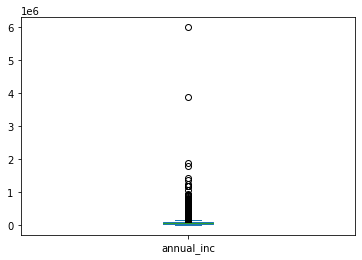

In [99]:
df_c['annual_inc'].plot.box()
plt.show()

In [100]:
df_c['annual_inc']=df['annual_inc'].apply(lambda x:round(x,2))

In [101]:
# checking higher percentile range in annual income 
df_c['annual_inc'].quantile([0.9,0.95,0.98,0.99,1])

0.90     115000.00
0.95     140000.00
0.98     182969.28
0.99     230000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [102]:
# Removing rows, where annual income is greater than 99% percentile
df_c=df_c[df_c['annual_inc']<=df_c['annual_inc'].quantile(0.99)]

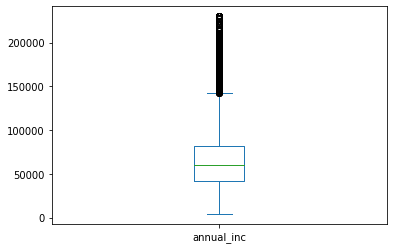

In [103]:
df_c['annual_inc'].plot.box()
plt.show()

lets check for outliers in 'open_acc' column

In [104]:
df_dict['open_acc']

"The number of open credit lines in the borrower's credit file."

#### lets check for outliers in 'revol_bal' column

<Axes: >

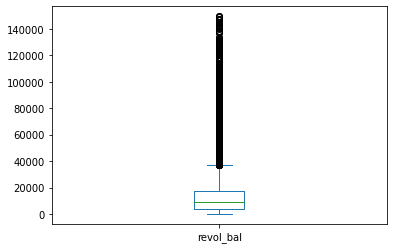

In [105]:
df_c['revol_bal'].plot.box()

In [106]:
#removing outliers from 'revol_bal' column
df_c=df_c[df_c['revol_bal']<=df_c['revol_bal'].quantile(0.99)]

<Axes: >

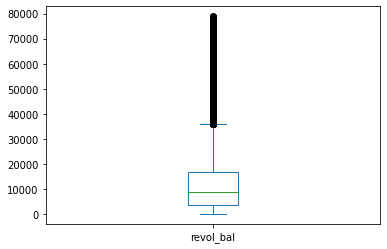

In [107]:
df_c['revol_bal'].plot.box()

lets check for outliers in 'total_acc' column

<Axes: >

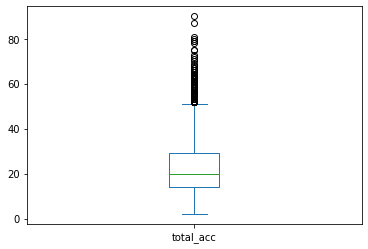

In [108]:
df_c['total_acc'].plot.box()

In [109]:
df_c=df_c[df_c['total_acc']<=df_c['total_acc'].quantile(0.99)]

<Axes: >

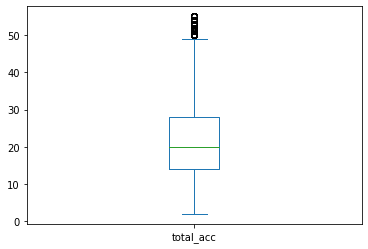

In [110]:
df_c['total_acc'].plot.box()

### Some features which may not impact the process of approving the loan. Some of which are post approval features

$\bullet$ post approval features: 'total_pymnt', 'total_rec_prncp','total_rec_int','last_pymnt_amnt','last_credit_pull_d','last_pymnt_d'

$\bullet$ pre-approval feature: 'earliest_cr_line','earliest_cr_line_m','earliest_cr_line_y'

In [111]:
df_c.drop(['total_pymnt', 'total_rec_prncp','total_rec_int','out_prncp','last_pymnt_amnt','total_rec_late_fee','last_credit_pull_d','last_pymnt_d','recoveries','collection_recovery_fee','earliest_cr_line','earliest_cr_line_m','earliest_cr_line_y'],axis=1,inplace=True)

In [112]:
df_c.shape

(35370, 27)

### Now the data frame is free from outliers. Before performing Data Analysis, it is a good routine to save the cleaned dataframe into a csv file 

In [113]:
df_c.to_csv(r'E:\upgrad\lending case study\loan_final.csv', index=False)

# 4. Exploratory Data Analysis

In [114]:
df=pd.read_csv(r'E:\upgrad\lending case study\loan_final.csv')

## 4.1 Analyzing Target Column 'loan_status'

In [115]:
df['loan_status'].value_counts()

Fully Paid     29504
Charged Off     4824
Current         1042
Name: loan_status, dtype: int64

The main aim of this case study is identify reasons for a consumer to default loan based on different consumer and loan attributes. The **loan_status==Current** identicate the consumer is still paying installment for the loan and not fully paid. Hence, we can drop the corresponding records and keep the records related to "Fully Paid" and "Charged Off" 

In [116]:
df=df[df['loan_status']!="Current"]

In [117]:
df.shape

(34328, 27)

1042 records related to loan status as Current are removed

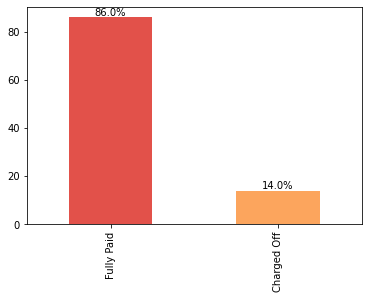

In [118]:
f=round(df['loan_status'].value_counts()/len(df)*100).plot.bar(color=sns.color_palette("Spectral"))
for val in f.containers:
        f.bar_label(val,fmt='%.1f%%', label_type='edge')
plt.show()

**Observation:** <mark>**14%**<mark> of the Lending Club loans are <mark>defaulted<mark> and lending club <mark>recovered **86%**<mark> of loans successfully from year 2007 to 2011  

## 4.2 Univariate Analysis

In [119]:
# defining column labels as dictionary, used for plotting
col_labels = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Applicant Grade',
    'sub_grade': 'Applicant Sub-Grade',
    'emp_title': 'Job-Title of the Employee',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Ownership Status',
    'annual_inc': 'Annua Income',
    'verification_status': 'Loan Verification Status',
    'issue_d': 'Loan Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'delinq_2yrs': 'Credit Delinquency', 
    'inq_last_6mths': 'Number of Inquiries',
    'open_acc': 'Number of Open Credit Lines',
    'pub_rec': 'Number of Derogatory Public Records',
    'revol_bal': 'credit revolving balance',
    'revol_util': 'Revolving Line Utilization Rate',
    'total_acc':"Total Credit Lines",
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'loan_amnt_cat': 'Loan Amount Categories',
    'funded_amnt_cat':'Funded Amount Categories',
    'annual_inc_cat': 'Annual Income Groups',
    'int_rate_cat': 'Interest Rate Categories',
    'dti_cat': 'Debt To Income Ratio Categories'
}

In [120]:
df_dict['emp_title']

'The job title supplied by the Borrower when applying for the loan.*'

### Univariate Analysis for Categorical Variables

**Creating bins for 'loan_amnt', 'funded_amnt' and 'int_rate' columns** 

In [121]:
df[['loan_amnt','funded_amnt','int_rate']].describe()

,loan_amnt,funded_amnt,int_rate
count,34328.000000,34328.000000,34328.000000
mean,10974.302319,10717.146353,11.956669
std,7202.198570,6954.084275,3.685531
min,500.000000,500.000000,5.420000
25%,5450.000000,5325.000000,8.940000
50%,9600.000000,9575.000000,11.830000
75%,15000.000000,15000.000000,14.460000
max,35000.000000,35000.000000,24.400000


In [122]:
# Categorical columns are created based percentil values 
df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], 7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['funded_amnt_cat'] = pd.cut(df['funded_amnt'], 7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['int_rate_cat'] = pd.cut(df['int_rate'], 5,labels=['Very Low','Low','Moderate','High','Very high'])

In [123]:
# function for creating barplots for derived categorical variable and corresponding numerical variable
def plotcat_boxbar(column,column_cat):
    fig, ax = plt.subplots(1,2, figsize=(16, 4))
    plt.subplot(1,2,1)
    f=round(df[column_cat].value_counts()/len(df)*100,2).plot.barh(color=sns.color_palette("Spectral"))
    for val in f.containers:
        f.bar_label(val, fmt='%.1f%%', label_type='edge')
    plt.xlabel(col_labels[column_cat],fontsize=14)
    plt.subplot(1,2,2)
    df[column].plot.box()
    plt.xlabel(col_labels[column],fontsize=14)
    plt.tight_layout()
    plt.show()    

In [124]:
# function for creating barplots displaying percentage values for categorical variable 
def plotcat_bar(column):
    plt.figure(figsize=(9,5))
    f=round(df[column].value_counts()/len(df)*100,2).plot.bar(color=sns.color_palette("Spectral"))
    for val in f.containers:
        f.bar_label(val, fmt='%.1f%%', label_type='edge')
    plt.title(col_labels[column],fontsize=14)
    plt.ylabel('Percentage',fontsize=14)
    plt.show()

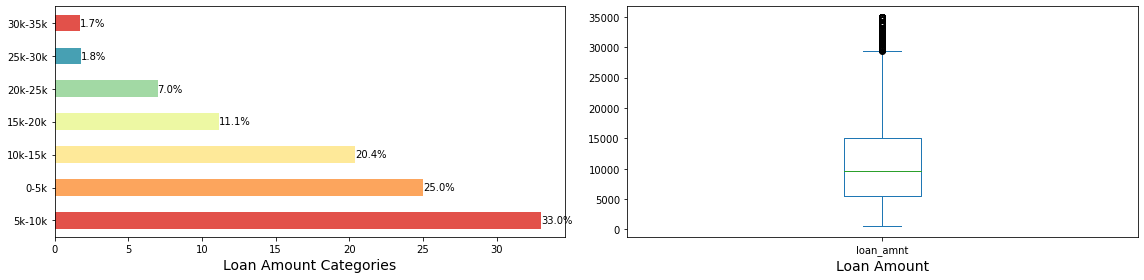

In [125]:
plotcat_boxbar('loan_amnt','loan_amnt_cat')

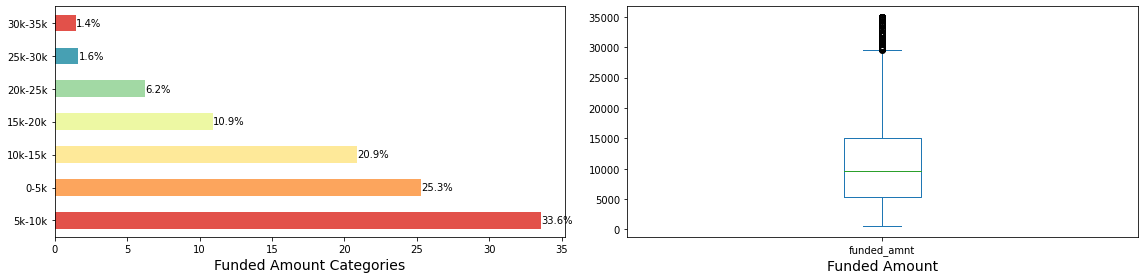

In [126]:
plotcat_boxbar('funded_amnt','funded_amnt_cat')

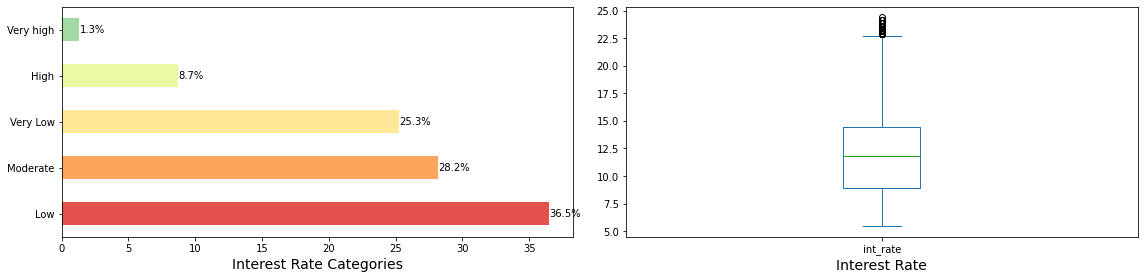

In [127]:
plotcat_boxbar('int_rate','int_rate_cat')

**Observation:**  
1. <mark> 33 % of the total loans fall under 5-10K loan amount category i.e., maximum percentage of lending club approved loans are of small amounts the range between 5000 to 10000 dollars. <mark>
2. <mark> Interest rates of the most lending club loans are low. <mark>

#### Creating bins for 'annual_inc' and 'dti' columns

In [128]:
df['annual_inc_cat'] = pd.cut(df['annual_inc'], 5,labels =['VLIG(0-40k)','LIG(40-60k)','MIG(60-80k)','HIG(80-100k)','SIG(Above 100k)'])
df['dti_cat']= pd.cut(df['annual_inc'], 5,labels =['Very Low','Low','Moderate','High','Very High'])

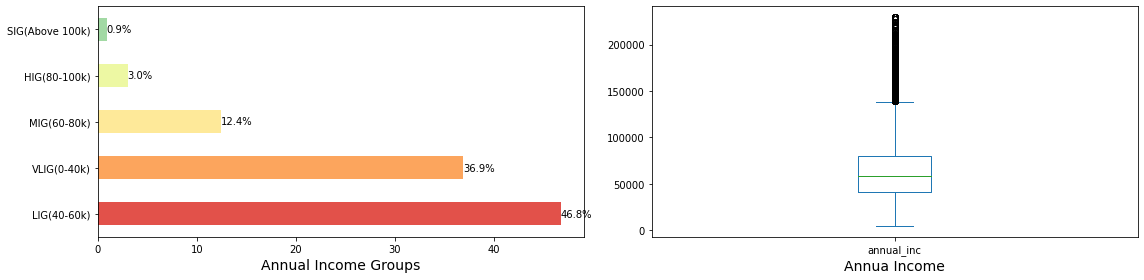

In [129]:
plotcat_boxbar('annual_inc','annual_inc_cat')

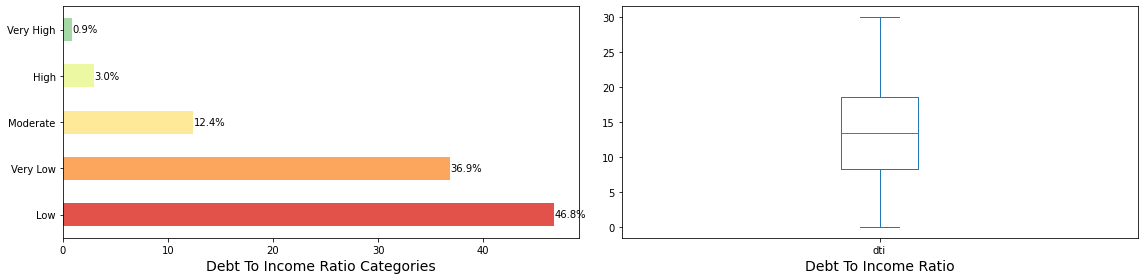

In [130]:
plotcat_boxbar('dti','dti_cat')

**Oberservation**: 
1. <mark> People under Low Income Group (LIG) applied for maximum (47%) of loans
2. <mark> Around 47% of lending club aprroved loans have low Debt-to-income Ratio

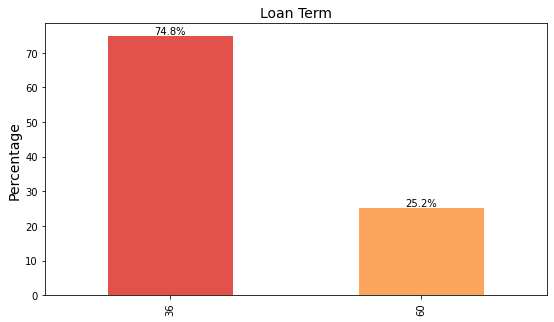

In [131]:
plotcat_bar('term')

**Observation:** <mark> Around 75% of the Lending Club Loans have term of 3 years and only 25% of the lending club loans have term of 5 years

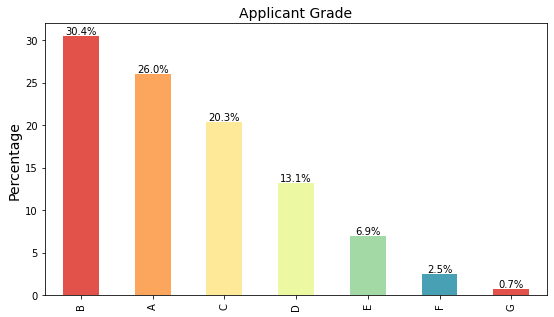

In [132]:
plotcat_bar('grade')

Text(0.5, 1.0, 'Applicant Sub-Grade')

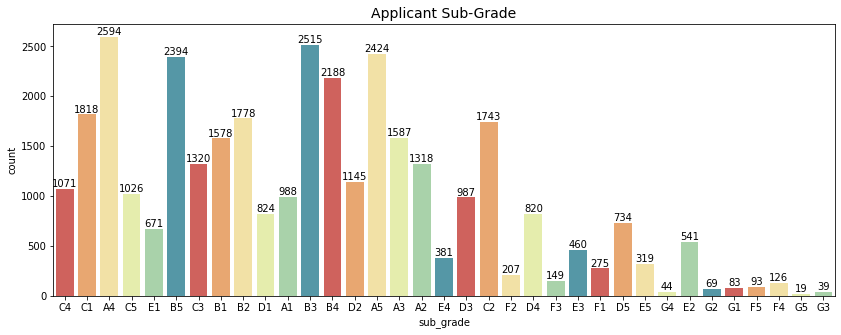

In [133]:
plt.figure(figsize=(14,5))
f=sns.countplot(df,x='sub_grade',palette=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val)
plt.title(col_labels['sub_grade'],fontsize=14)

**Observation:** 
1. <mark> Around 30% of the Lending Club Loans are applied by people belonging to Grade-B
2. <mark> Around 26% of the Lending Club Loans are applied by people belonging to Grade-A
3. <mark> Around 20% of the Lending Club Loans are applied by people belonging to Grade-c
4. <mark> People who belong to Sub-grade-A4, B3, B4, B5 applied for maximum loans approved by Lending Club

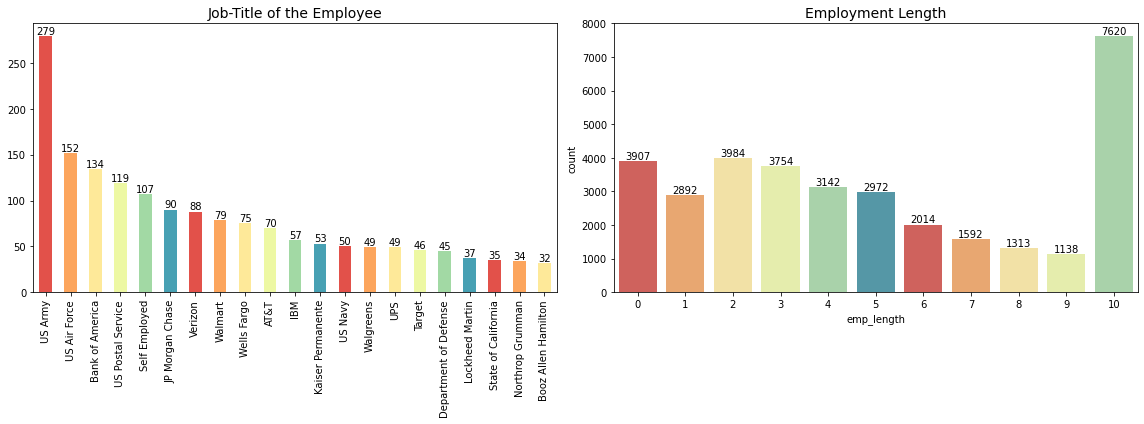

In [134]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
plt.subplot(1,2,1)
f1=df['emp_title'].value_counts()[df['emp_title'].value_counts()>30].plot.bar(color=sns.color_palette("Spectral"))
for val in f1.containers:
    f1.bar_label(val)
plt.title(col_labels['emp_title'],fontsize=14)
plt.subplot(1,2,2)
f2=sns.countplot(df,x='emp_length',palette=sns.color_palette("Spectral"))
for val in f2.containers:
    f2.bar_label(val)
plt.title(col_labels['emp_length'],fontsize=14)
plt.tight_layout()
plt.show()

**Observation:** 
1. <mark> Employees from United States Army applied for most loans
2. <mark> It is oberserved that employees from US government based organizations, Central Banks and have private self employed business applied for maximum number of loans 
3. <mark> Employees with experience of 10 or more than 10 years applied for maximum number of loans
4. <mark> It is observed that as the experience of the employee keeps increasing, the number of loans also decreased. However, if employee have more than 10 years of experience are more likely to apply for loans. This might be due to increased annual income or need for better state of living       

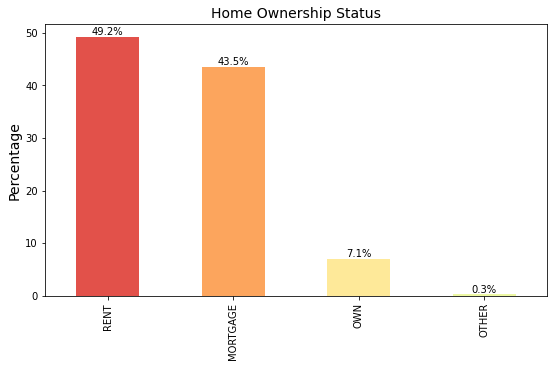

In [135]:
plotcat_bar('home_ownership')

**Obervations:** 
1. <mark> People with rental housing and house/property mortage applied for maximum number of loans compared to people with own housing.
2. Major reason:
    
   a <mark> People with rental housing are likely to take loans for buying their own house
    
   b <mark> People with house/property mortage are likely to take loans for debt-consolidation (which will be checked in bivariate analysis)

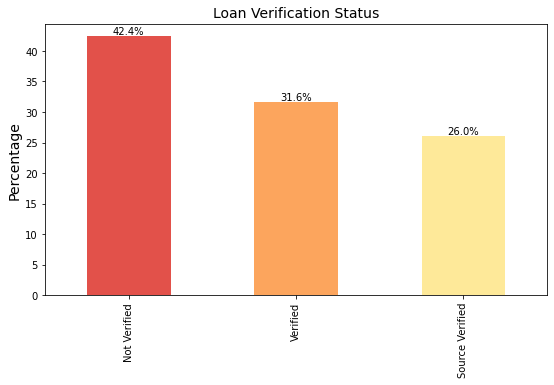

In [137]:
plotcat_bar('verification_status')

**Obervations:** <mark> Around 42% of the lending club loans are not verifed. This might lead to loan defaulting

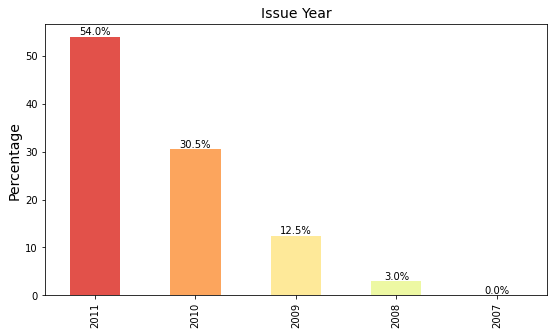

In [138]:
plotcat_bar('issue_y')

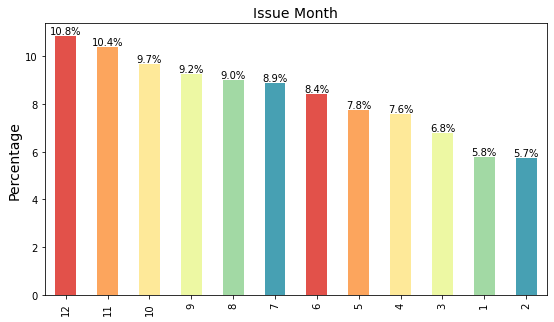

In [139]:
plotcat_bar('issue_m')

**Obervations:** 
1. <mark>Maximum number ( 54% ) of the loans are issued in the year 2011.
2. <mark>Maximum number ( 11% ) of the loans are issued in the month of December.

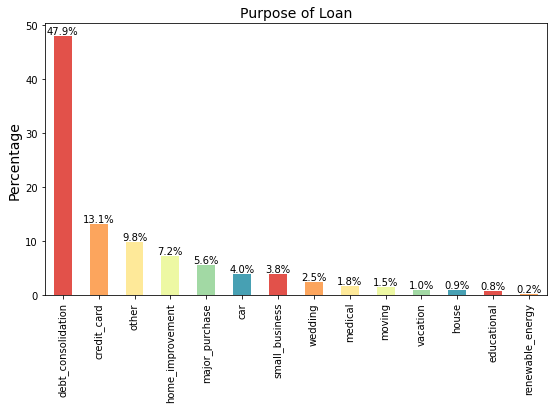

In [140]:
plotcat_bar('purpose')

**Obervations:** 
1. <mark>Maximum number ( 54% ) of the lending club loans are applied for the purpose of debt consolidation.

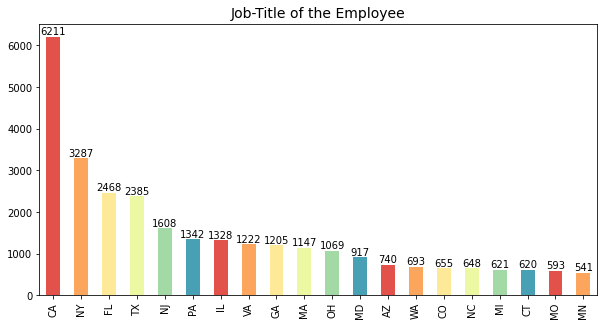

In [141]:
plt.figure(figsize=(10,5))
f1=df['addr_state'].value_counts()[df['addr_state'].value_counts()>500].plot.bar(color=sns.color_palette("Spectral"))
for val in f1.containers:
    f1.bar_label(val)
plt.title(col_labels['emp_title'],fontsize=14)
plt.show()

**Obervations:** 
1. <mark> People from California State applied for maximum number of the lending club loans.

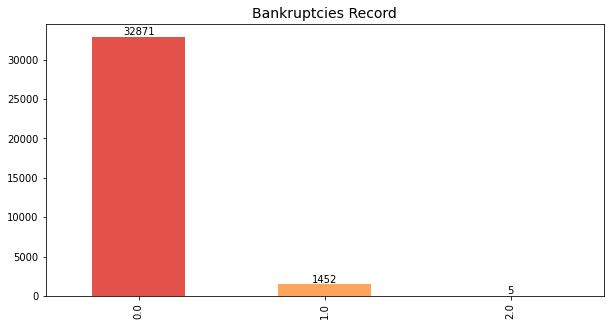

In [186]:
plt.figure(figsize=(10,5))
f1=df['pub_rec_bankruptcies'].value_counts().plot.bar(color=sns.color_palette("Spectral"))
for val in f1.containers:
    f1.bar_label(val)
plt.title(col_labels['pub_rec_bankruptcies'],fontsize=14)
plt.show()

### Univariate Analysis for Numerical Variables

In [143]:
num_cols=['installment','open_acc','revol_bal','revol_util','total_acc','open_acc']

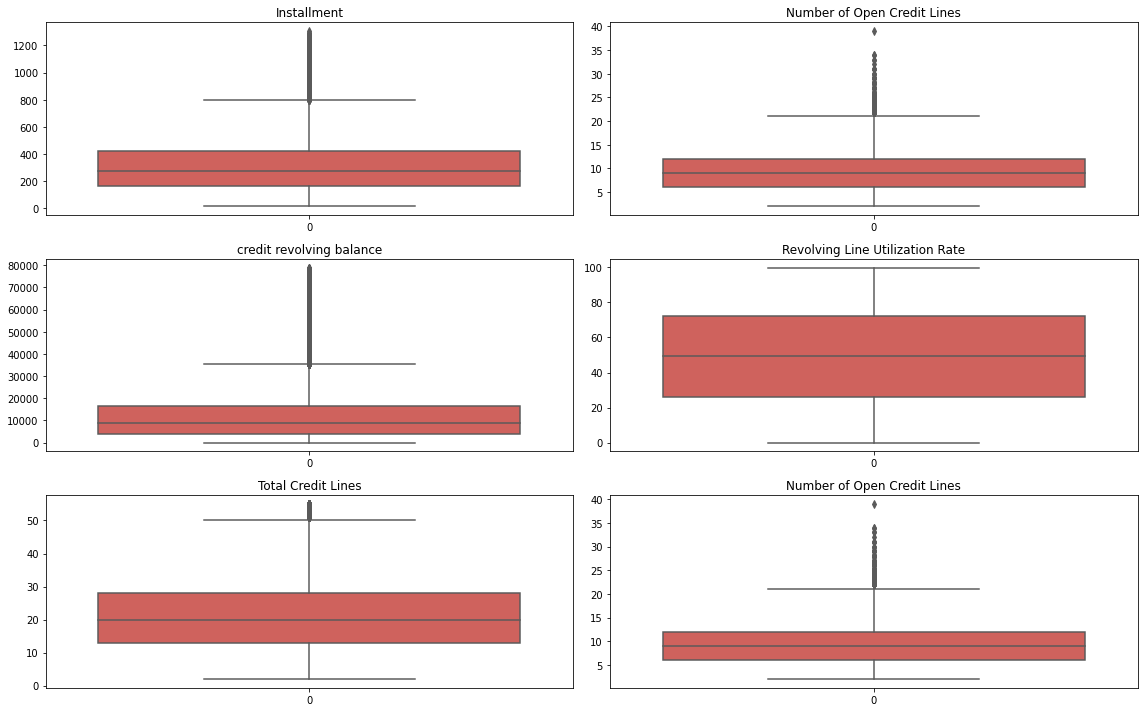

,installment,open_acc,revol_bal,revol_util,total_acc,open_acc
count,34328.000000,34328.000000,34328.000000,34328.000000,34328.000000,34328.000000
mean,319.483303,9.195642,12182.173095,49.103013,21.651859,9.195642
std,203.142133,4.241137,12254.557962,28.212408,10.692519,4.241137
min,16.080000,2.000000,0.000000,0.000000,2.000000,2.000000
25%,166.800000,6.000000,3688.000000,25.900000,13.000000,6.000000
50%,277.350000,9.000000,8708.000000,49.700000,20.000000,9.000000
75%,419.847500,12.000000,16389.250000,72.500000,28.000000,12.000000
max,1305.190000,39.000000,78935.000000,99.900000,55.000000,39.000000


In [144]:
fig, ax = plt.subplots(int(len(num_cols)/2),2, figsize=(16, 10))
for i in range(len(num_cols)):
    plt.subplot(int(len(num_cols)/2),2,i+1)
    sns.boxplot(df[num_cols[i]],palette=sns.color_palette("Spectral"))
    plt.title(col_labels[num_cols[i]])
plt.tight_layout()
plt.show()
df[num_cols].describe()

In [189]:
df['dti'].describe()

count    34328.000000
mean        13.412565
std          6.627309
min          0.000000
25%          8.330000
50%         13.510000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

**Observations:**
1. Loan Amount: 

    - <mark>75% of the loans have an loan amount below 15000 dollars.
    -<mark>mean is less the median, which indicates that the loan amount data is negatively skewed.
    
2. Interest Rate:

    - <mark>majority of the loans have an interest rate betwee 9-12%
    
    - <mark>Mean and Median are almost similar, which indicates zero skew and data following perfect normal distribution
    
    
3. Debt-to-Income Ratio: <mark>ranges between 0 and 30 with inter quartile range of 10


4. Installment: <mark>The IQR is 253 and mean greater than median, indicating the data is positively skewed.

# 4.3 Bivariate Analysis

### The Target 'loan_status' column vs Numerical attribute columns 

In [145]:
num_cols=['loan_amnt','int_rate','dti','installment','revol_bal','revol_util','total_acc','open_acc']
cat_cols=['loan_amnt_cat',
         'funded_amnt_cat',
         'term',
         'int_rate_cat',
         'grade',
         'emp_length', 
         'home_ownership',
         'annual_inc_cat',
         'verification_status',
         'issue_m', 'issue_y',
         'dti_cat',
         'delinq_2yrs', 
          'inq_last_6mths',
         'pub_rec',
         'pub_rec_bankruptcies',]

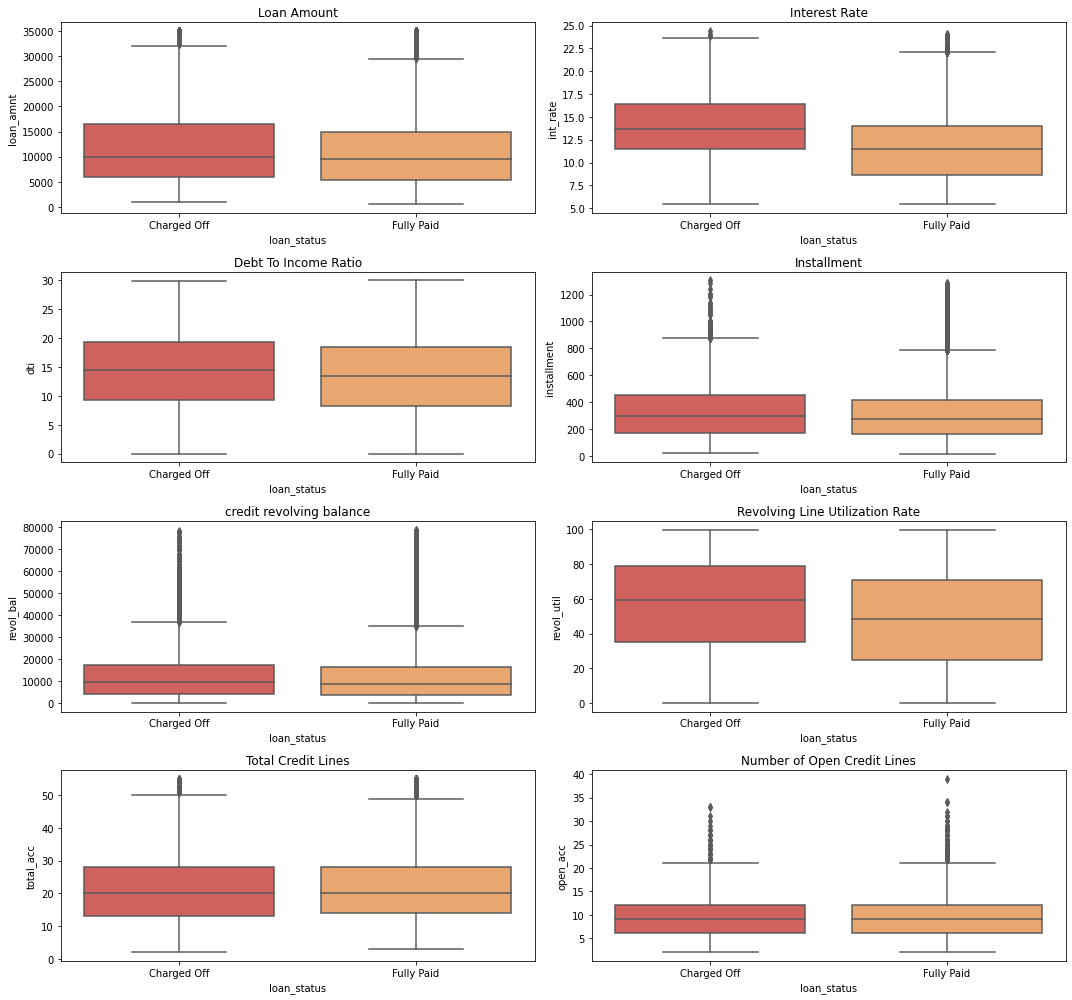

In [146]:
fig, ax = plt.subplots(int(len(num_cols)/2),2, figsize=(15, 14))
for i in range(len(num_cols)):
    plt.subplot(int(len(num_cols)/2),2,i+1)
    sns.boxplot(data=df,x='loan_status',y=num_cols[i],palette=sns.color_palette("Spectral"))
    plt.title(col_labels[num_cols[i]])
plt.tight_layout()
plt.show()

**Observations:**
After analyzing the above numerical columns with loan status, the major reasons for **loan Charged Off/default** are:
1. <mark>Higher Loan amount
2. <mark>Interest Rate
3. <mark>Higher Debt-to-Income Ratio
4. <mark>Higher Revolving line Utilization rate

### The Target 'loan_status' column vs Categorical columns 

In [192]:
def plotloanst_cat(column):
    fig, ax = plt.subplots(1,2, figsize=(16, 6))
    plt.subplot(1,2,1)
    f1=sns.countplot(df[df['loan_status']=='Charged Off'],x=column,palette=sns.color_palette("Spectral"))
    for val in f1.containers:
        f1.bar_label(val)
    plt.title(col_labels[column] + ' vs loan Charged Off',fontsize=14)
    plt.subplot(1,2,2)
    f1=sns.countplot(df[df['loan_status']=='Fully Paid'],x=column,palette=sns.color_palette("Spectral"))
    for val in f1.containers:
        f1.bar_label(val)
    plt.title(col_labels[column] + ' vs loan Fully Paid',fontsize=14)
    plt.tight_layout()
    plt.show()

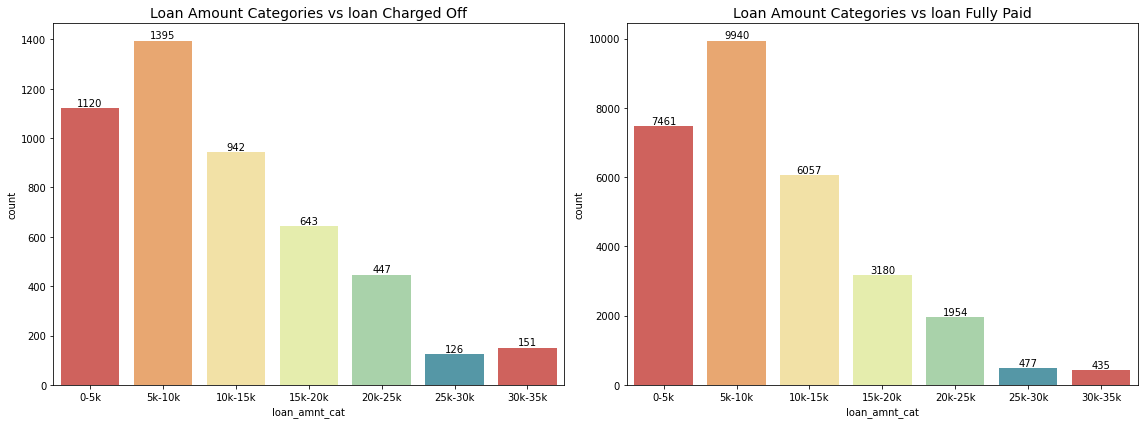

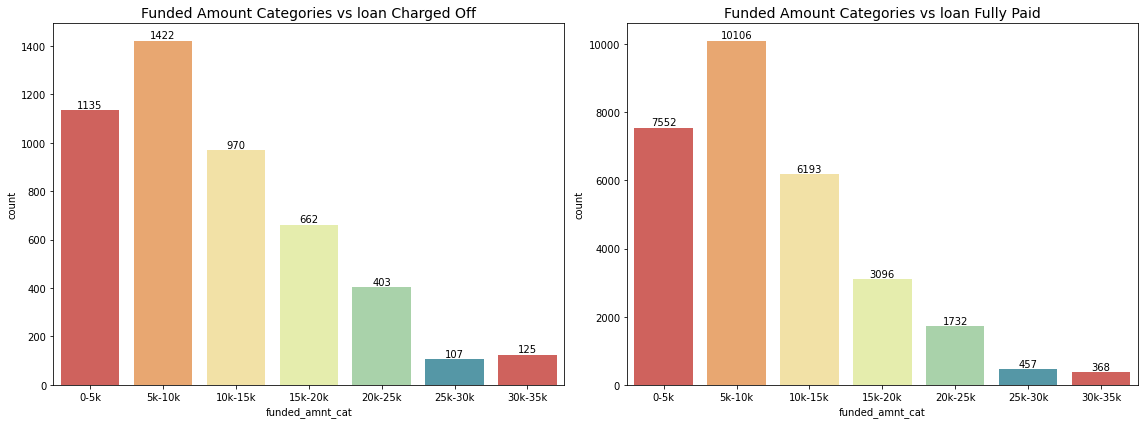

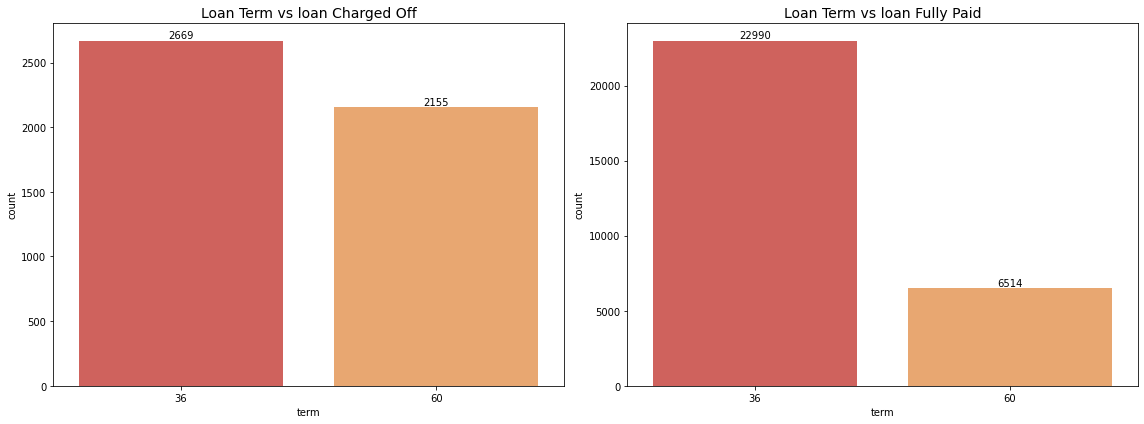

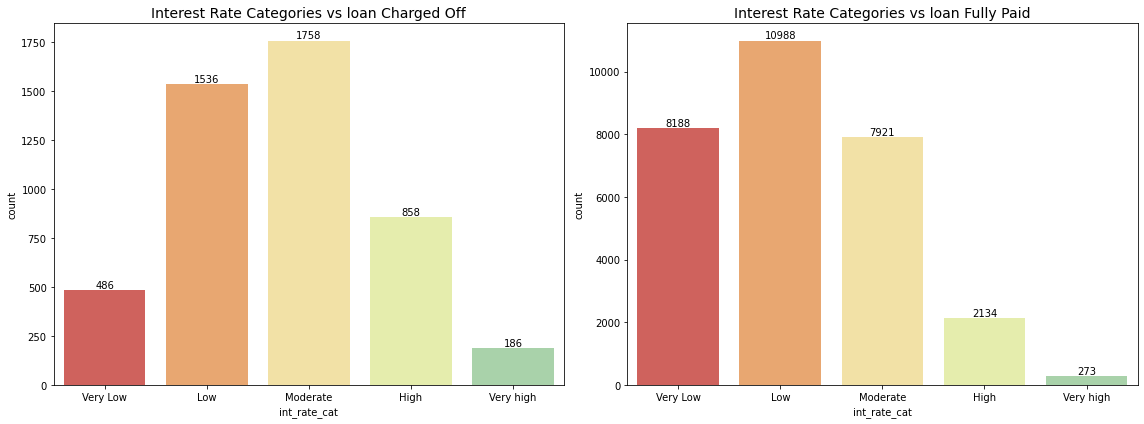

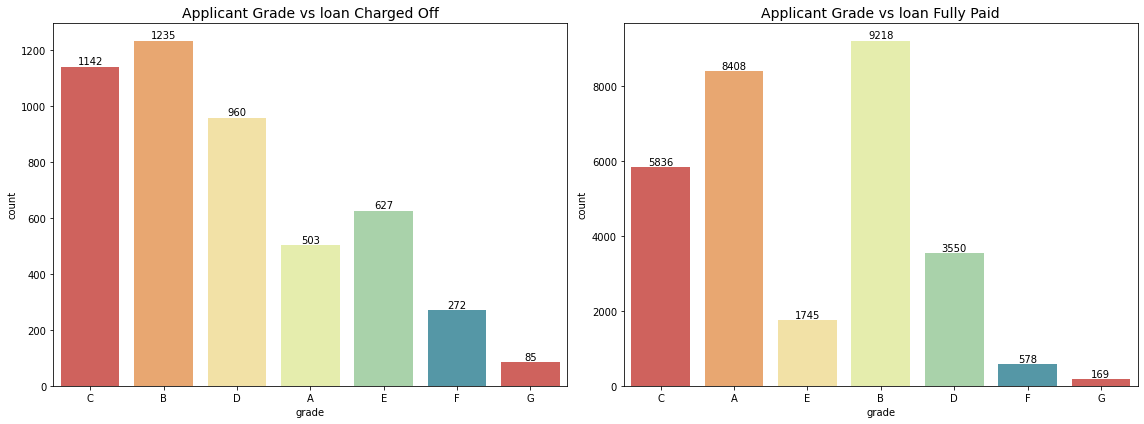

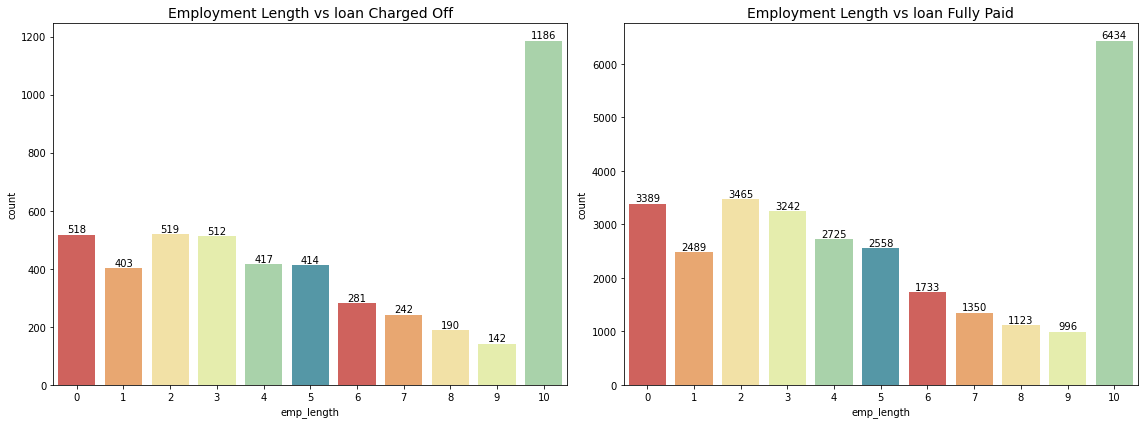

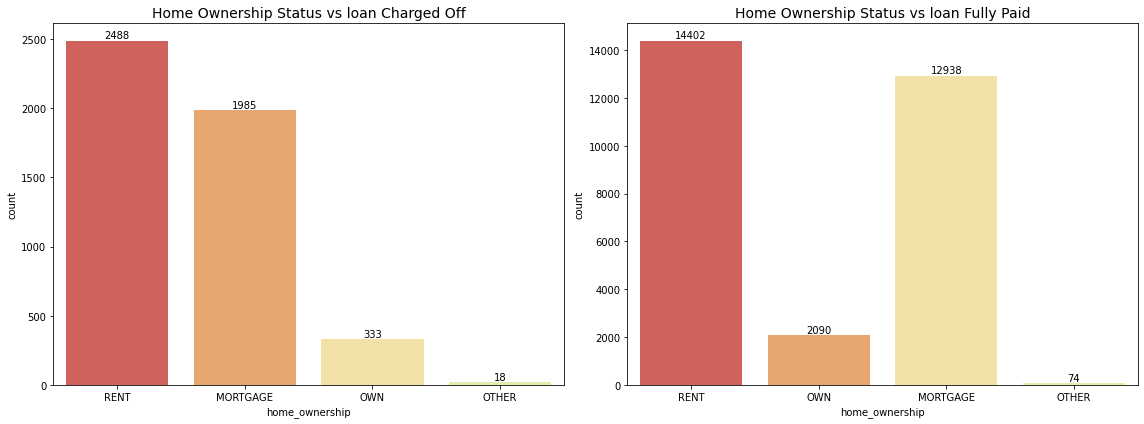

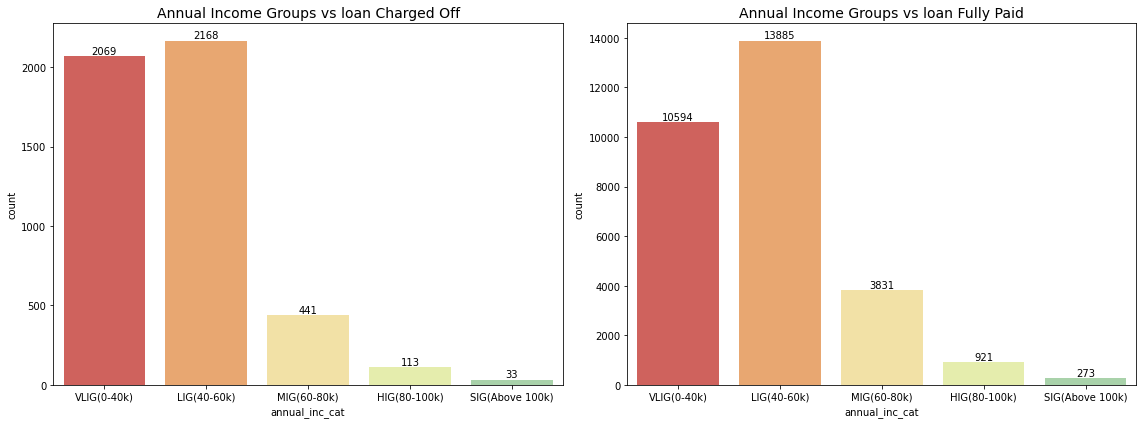

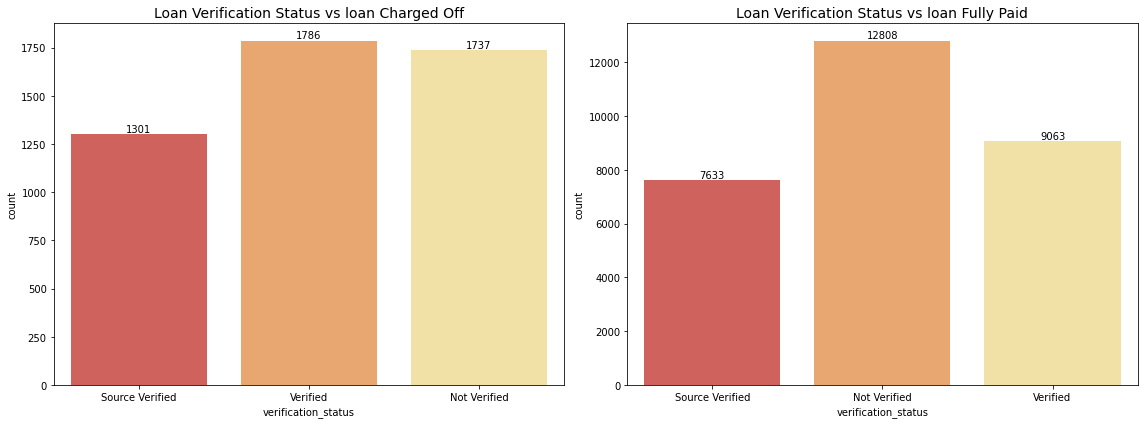

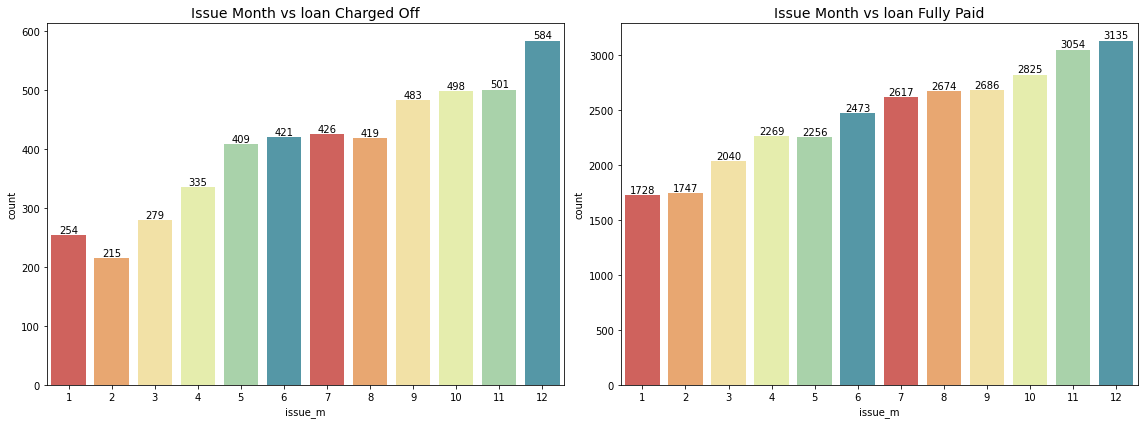

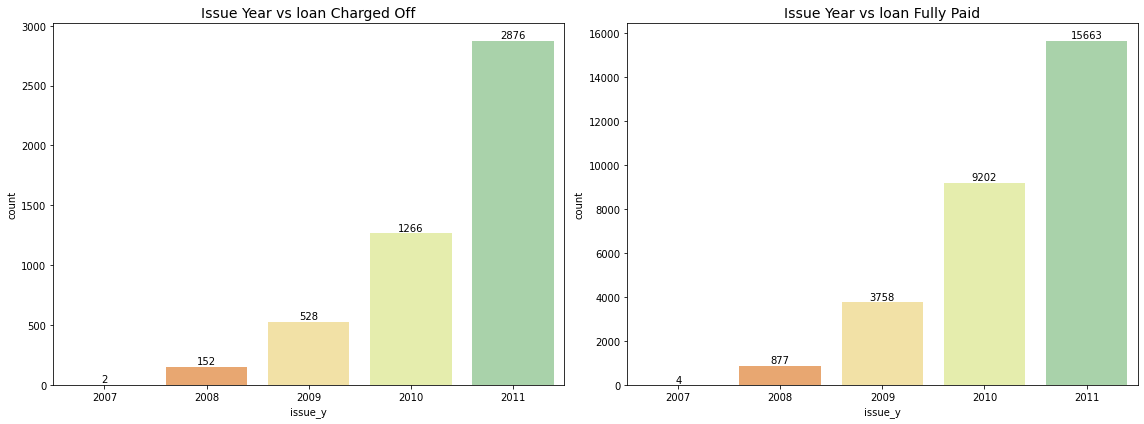

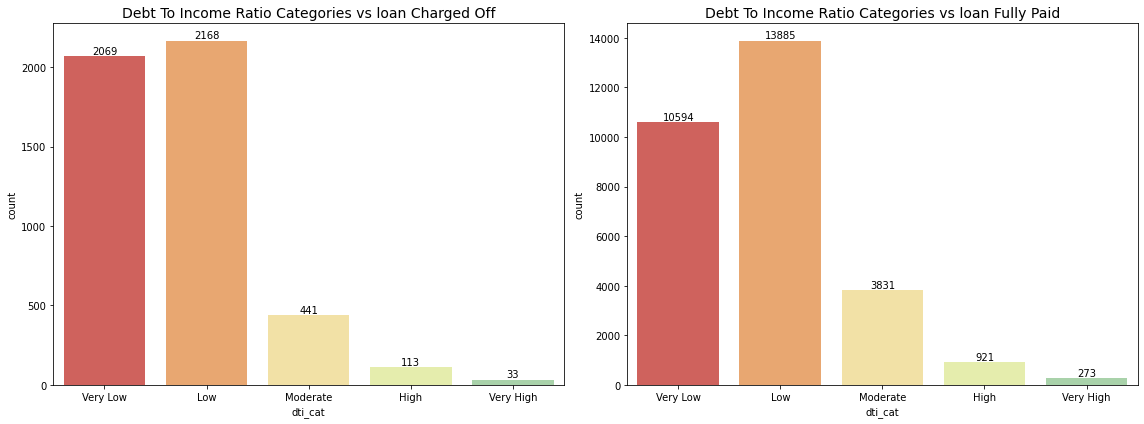

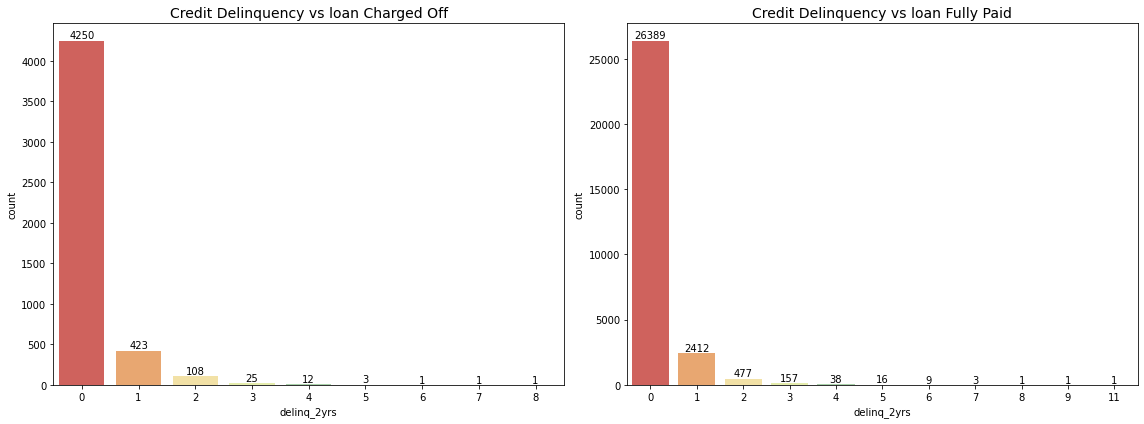

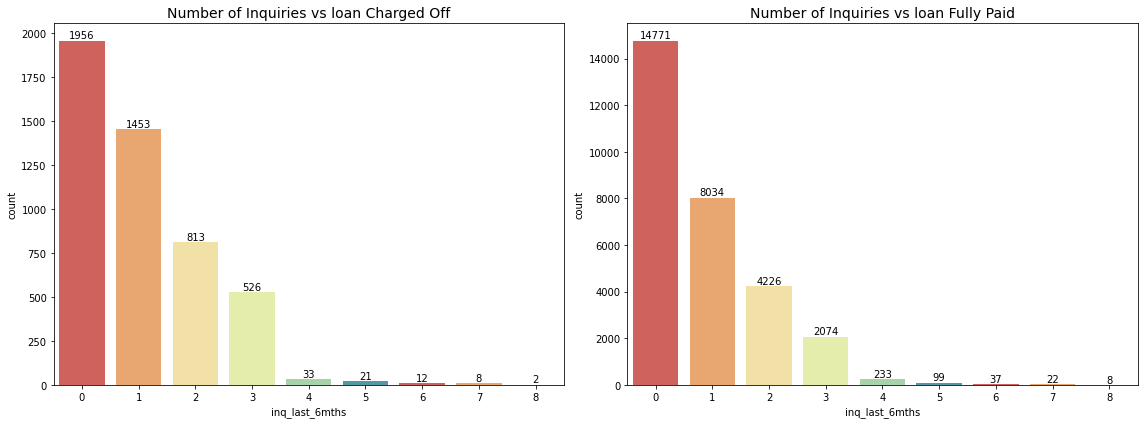

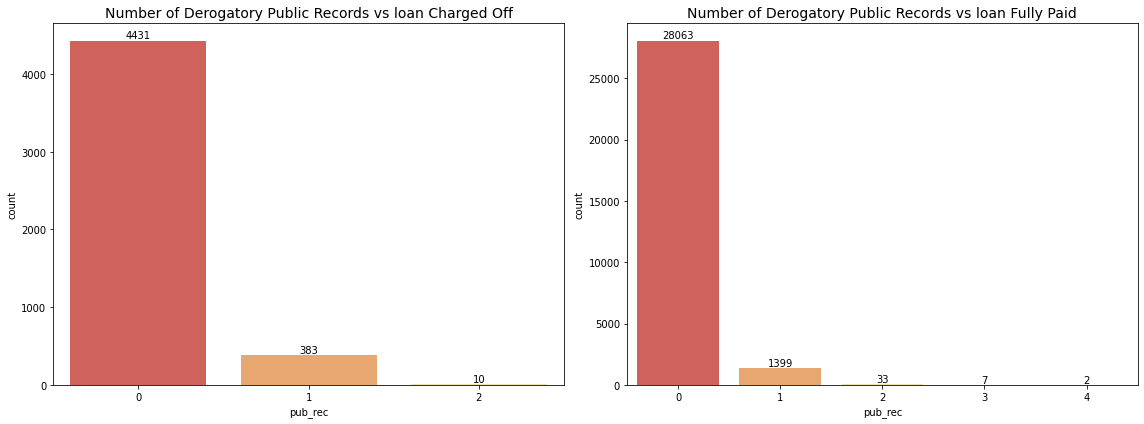

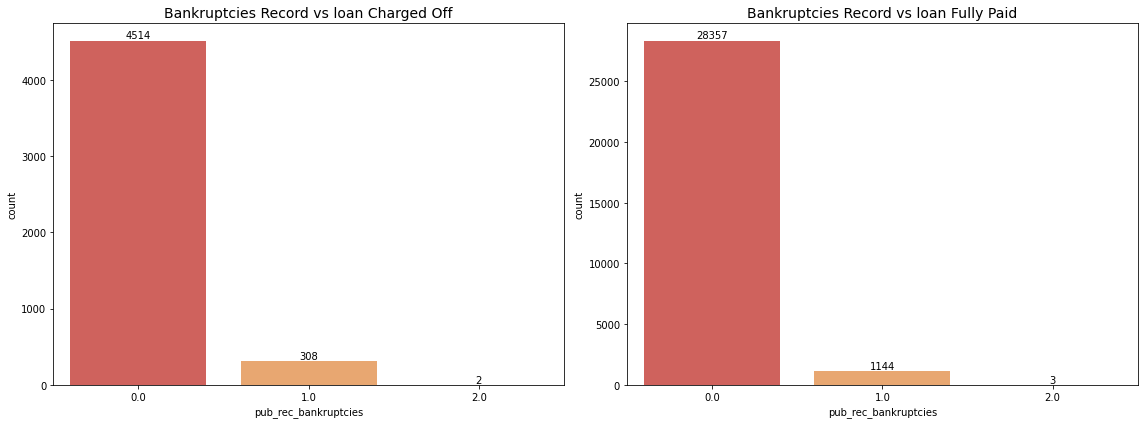

In [193]:
#Loan Status vs Categorical countplots
for i in cat_cols:
    plotloanst_cat(i)

In [194]:
# Only considering Loan charged off data to perform better analysis with other variables 
df_full=df[df['loan_status']=='Charged Off']
df_1=df[df['loan_status']=='Fully Paid']

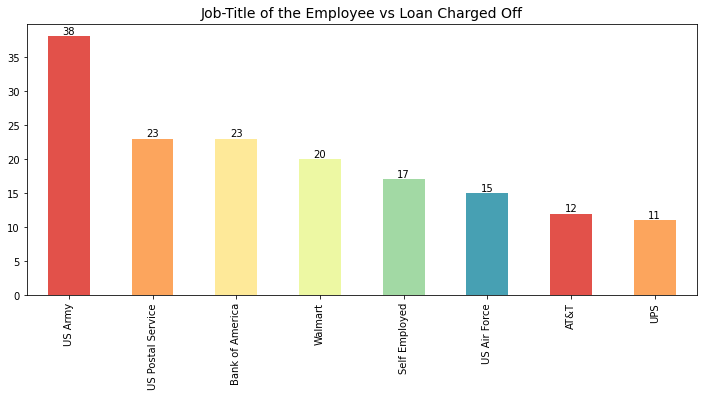

In [150]:
plt.figure(figsize=(12,5))
f=df_full['emp_title'].value_counts()[df_full['emp_title'].value_counts()>10].plot.bar(color=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val)
plt.title(col_labels['emp_title'] + ' vs Loan Charged Off',fontsize=14)
plt.show()

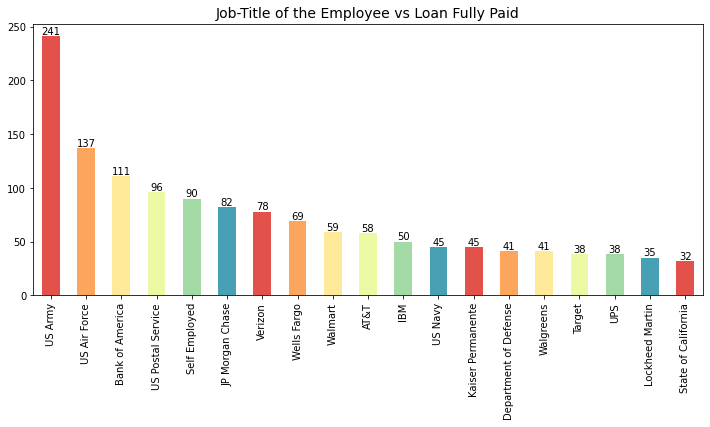

In [196]:
plt.figure(figsize=(12,5))
f=df_1['emp_title'].value_counts()[df_1['emp_title'].value_counts()>30].plot.bar(color=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val)
plt.title(col_labels['emp_title'] + ' vs Loan Fully Paid',fontsize=14)
plt.show()

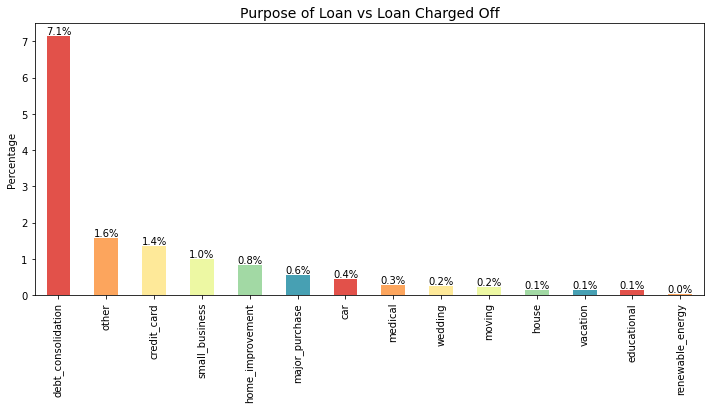

In [197]:
plt.figure(figsize=(12,5))
f=round(df_full['purpose'].value_counts()/len(df)*100,2).plot.bar(color=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val,fmt='%.1f%%', label_type='edge')
plt.ylabel('Percentage')
plt.title(col_labels['purpose'] + ' vs Loan Charged Off',fontsize=14)
plt.show()

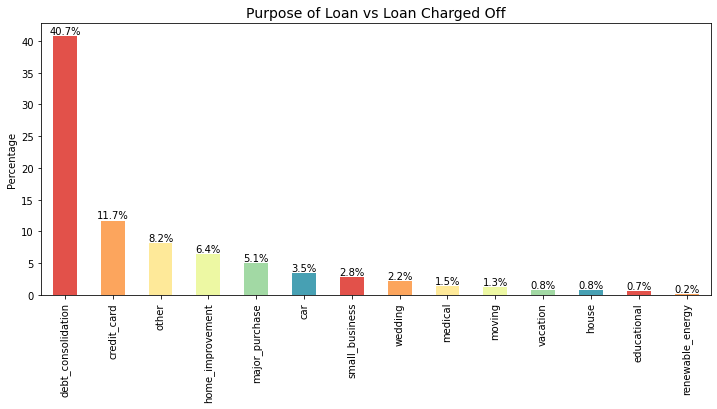

In [198]:
plt.figure(figsize=(12,5))
f=round(df_1['purpose'].value_counts()/len(df)*100,2).plot.bar(color=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val,fmt='%.1f%%', label_type='edge')
plt.ylabel('Percentage')
plt.title(col_labels['purpose'] + ' vs Loan Charged Off',fontsize=14)
plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark>loan amount in range 5-10K  
2. <mark>loan term is less (3 years) 
3. <mark>Interest Rate is Moderate/low (More loans are aprroved with low/moderate interest rates)
4. <mark>26% , 32% and 33% of loans taken People from lower Grades E, F and G are defaulted
5. <mark>Applicants have more than 10 years of employment experience (More loans are approved for higher cadre employee).
6. <mark>Applicants living in rented houses and have house/property mortgage.
7. <mark>Applicants belong to Low and very Low income groups.
8. <mark>Loans which are verified have defaulted more compared to loans which are not verified
9. <mark> Most of the loans are defaulted in the year 2011 and in the month of december.
10.<mark> loans of the applicants who have done more than 1 inquiry in the last 6 months.
11.<mark> loans applied by employess from US Army are defaulted more when compared to other organizations (More loans are approved for US Army employees).
12.<mark> Loans applied for debt consolidation purpose defaulted more. 

### Loan status of Various Income groups w.r.t to Debt-to-Income Ratio

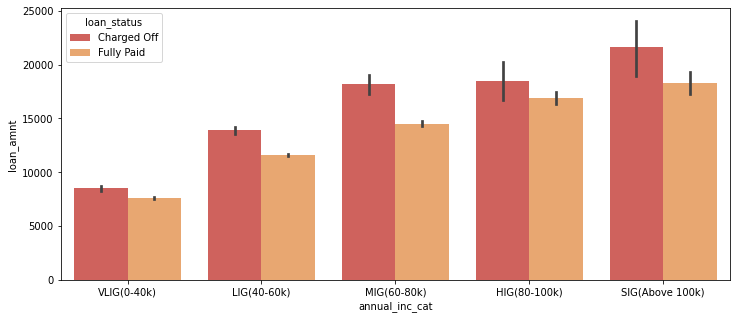

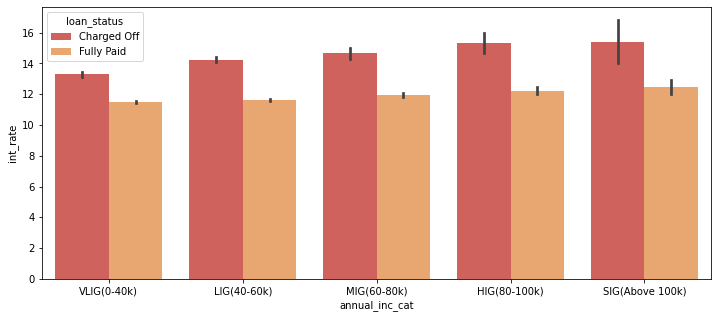

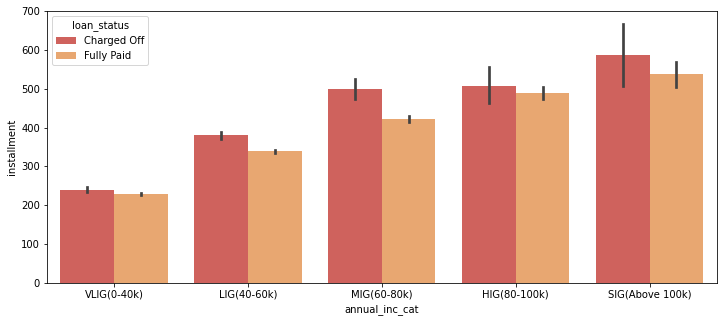

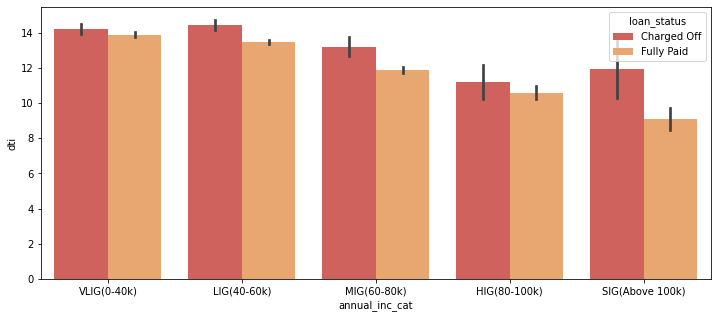

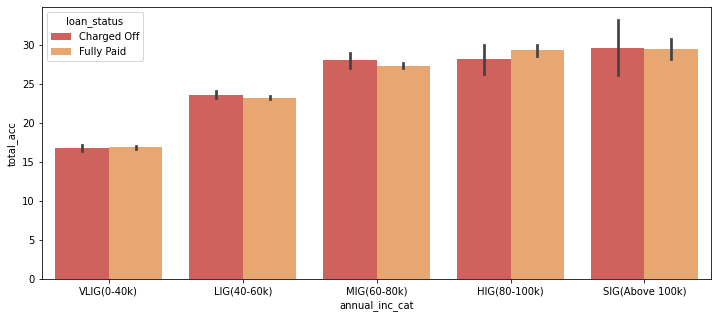

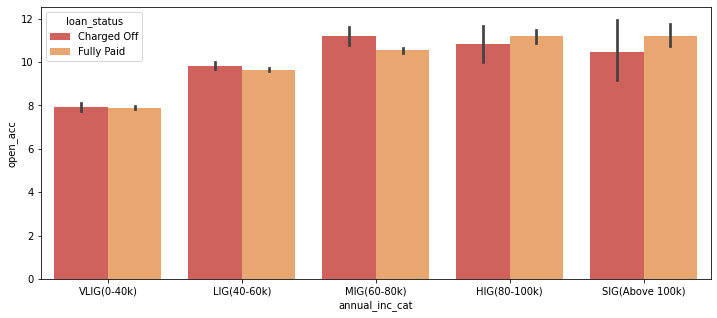

In [152]:
cc=['loan_amnt','int_rate','installment','dti','total_acc','open_acc']
for i in cc:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='annual_inc_cat', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark>In all income groups, higher loan amounts resulted in loan default. Higher loan amount is approved to SIG also resulted in loan default.    
2. <mark>As Applicants belonging to Superior Income geoups take large amounts of loans, their monthly installment is also high. 
3. <mark>As Loans corresponding to VLIG and LIG have higher DTI ratio.
4. <mark>Applicants belonging to higher income groups with more lines of credit defaulted more.
5. <mark>Applicants belonging to MIG having more than 10 open lines of credit defaulted more. 

## Loan status of Loan amount Categories w.r.t to numberical Variables

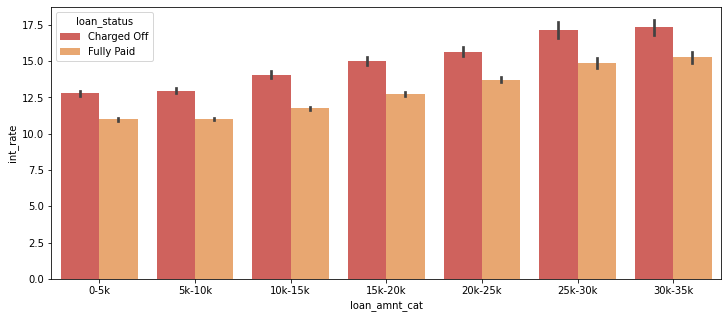

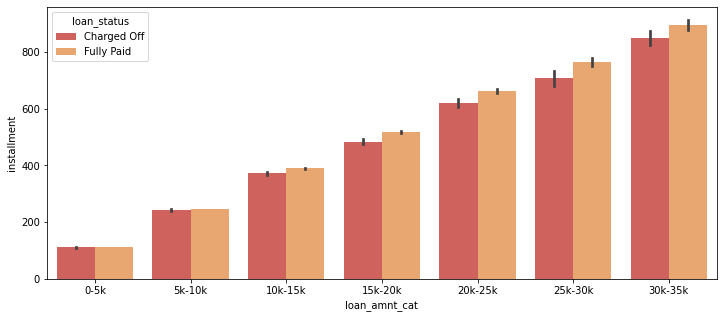

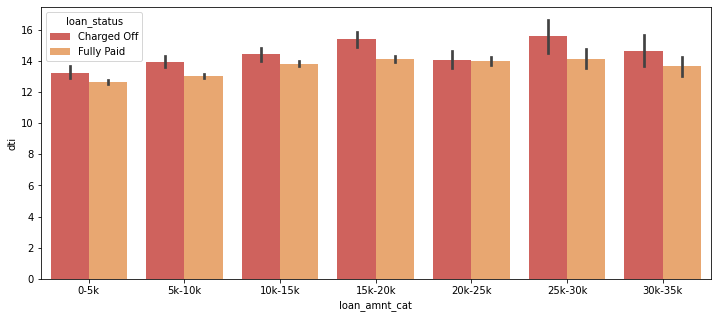

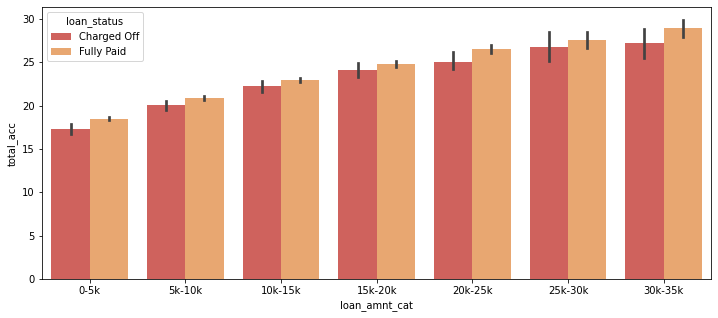

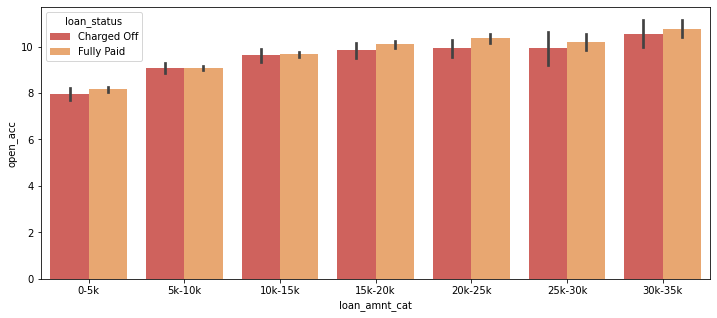

In [153]:
cc1=['int_rate','installment','dti','total_acc','open_acc']
for i in cc1:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='loan_amnt_cat', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark> Interest rate is always high for the loans which are defaulted irrespective of the loan amount
2. <mark>Applicants with loan amount ranging from 25k-35k and having higher interest rates.  
2. <mark>There is a linear relationship between loan amount and monthly installment. (Higher loans lead to higher monthly installments)
3. <mark>Applicants with loan amount ranging from 25k-30k and having higher debt-to-income ratio. 
4. <mark>Applicants with loan amount ranging from 25k-35k and having higher lines of credit.

## Loan status of Interest Rate Categories w.r.t to numberical Variables

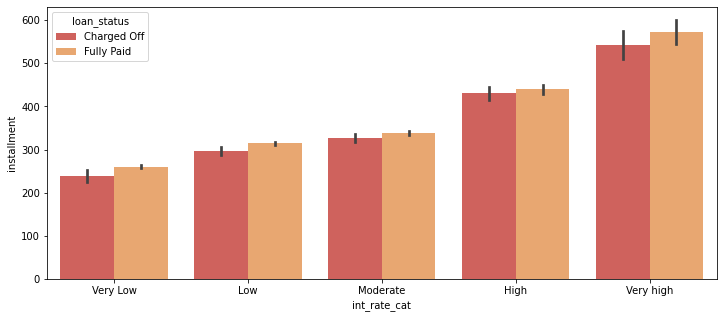

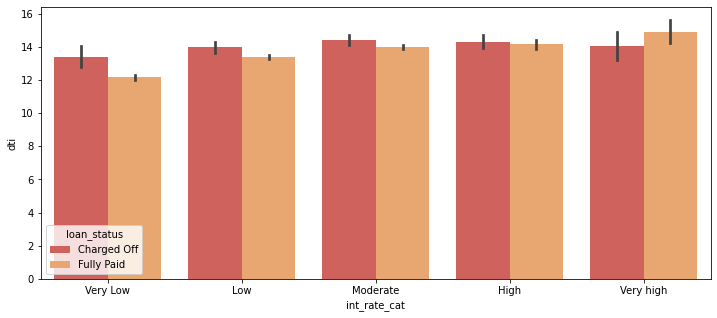

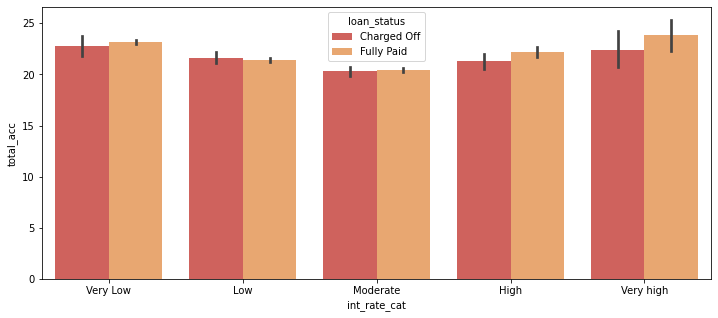

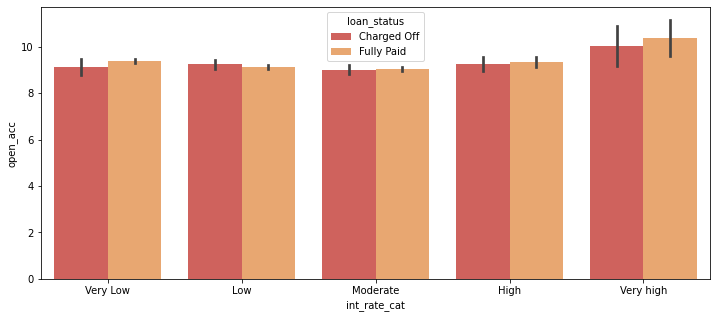

In [154]:
cc2=['installment','dti','total_acc','open_acc']
for i in cc2:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='int_rate_cat', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark>loans are defaulted when with interest rates are higher and have high monthly installment.  

## Term VS numberical Variables w.r.t Loan status

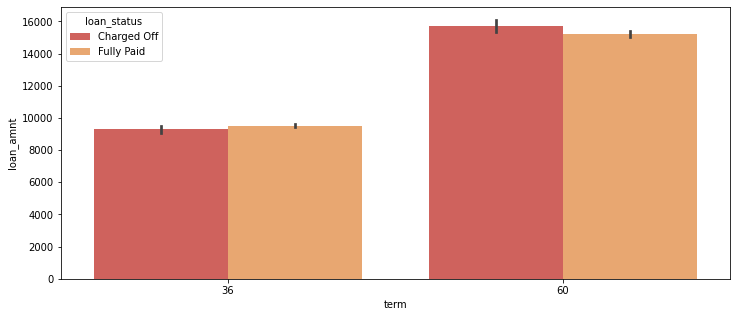

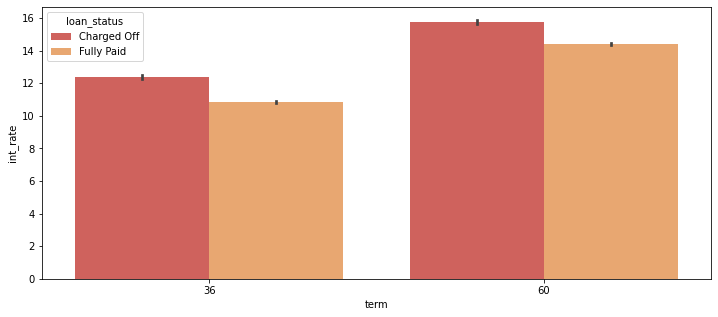

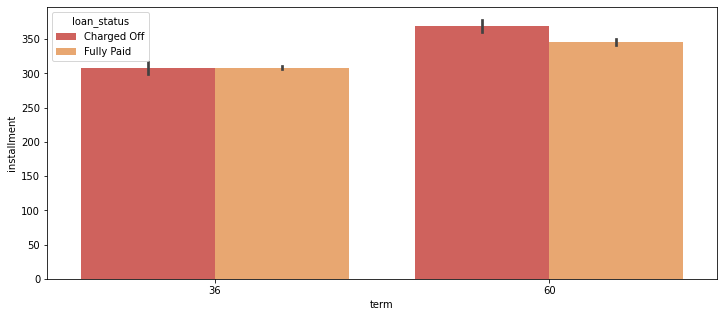

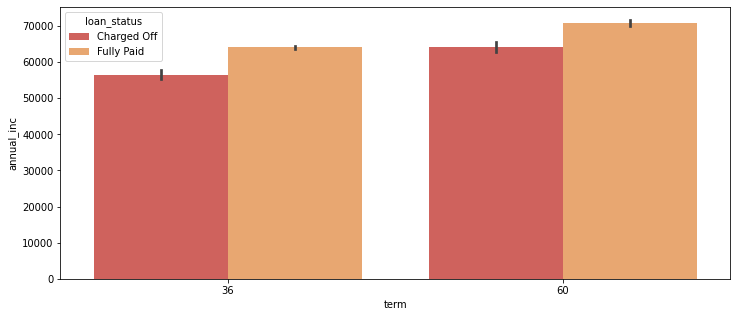

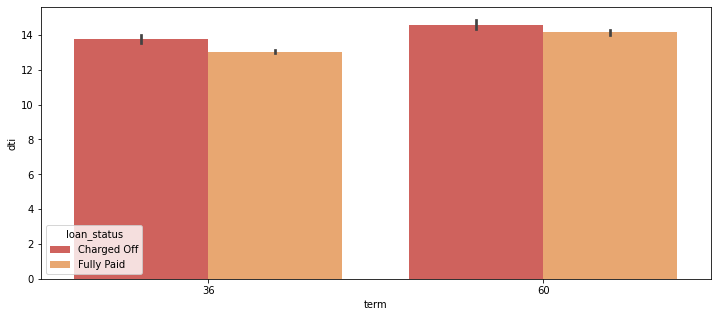

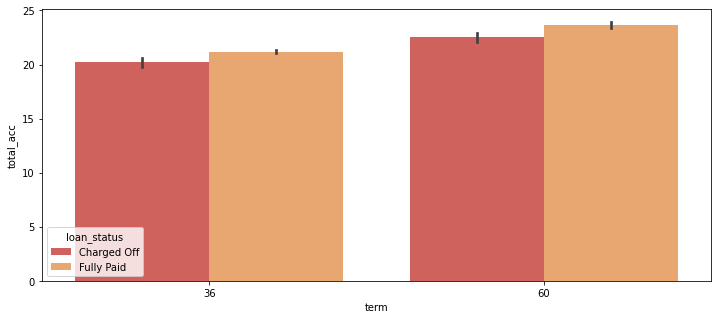

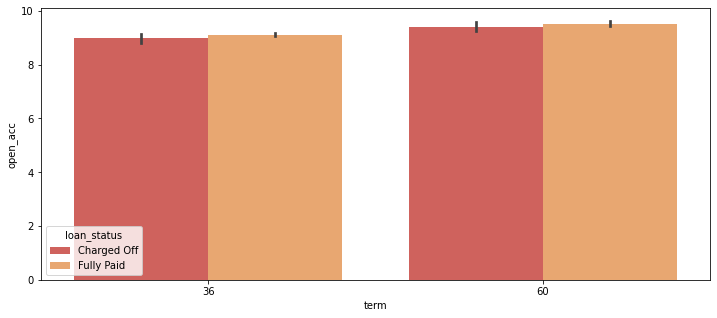

In [155]:
cc3=['loan_amnt','int_rate','installment','annual_inc','dti','total_acc','open_acc']
for i in cc3:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='term', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark>loans are defaulted when loan amount is higher and have 5 years of loan term.  
2. <mark>loans are defaulted when Interest rate is higher and have 5 years of loan term.
3. <mark>loans are defaulted when monhtly installment is high and have 5 years of loan term. 

## Grade VS numberical Variables w.r.t Loan status

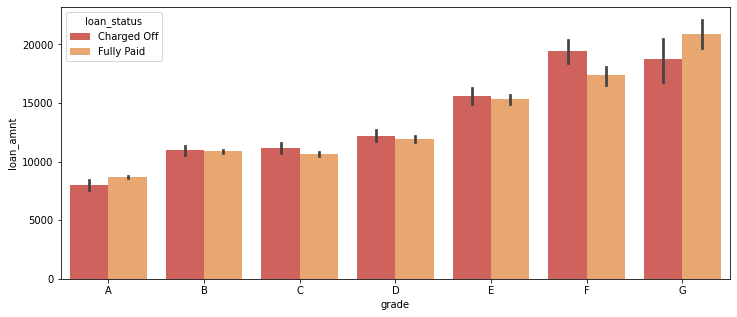

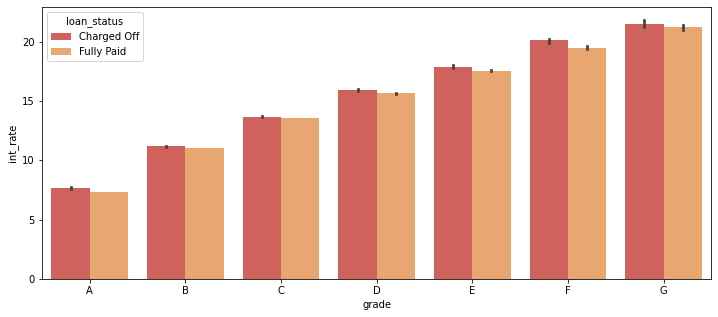

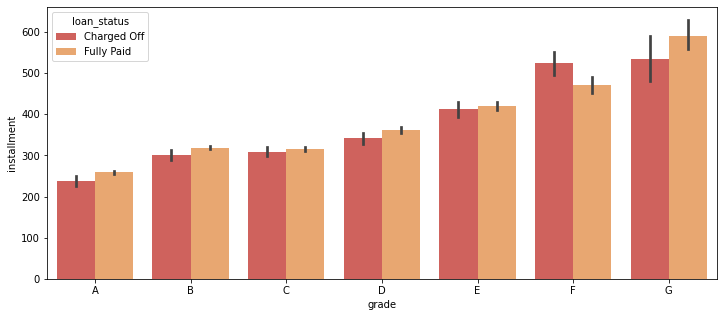

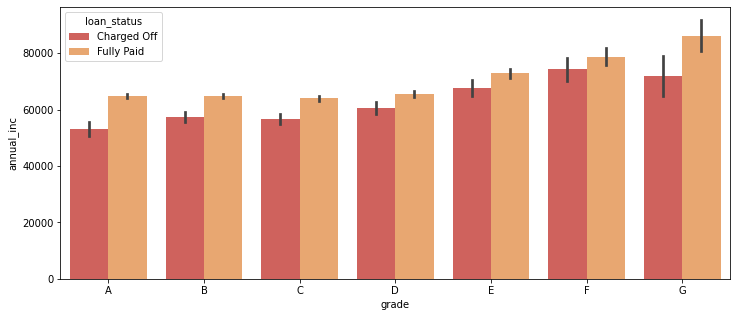

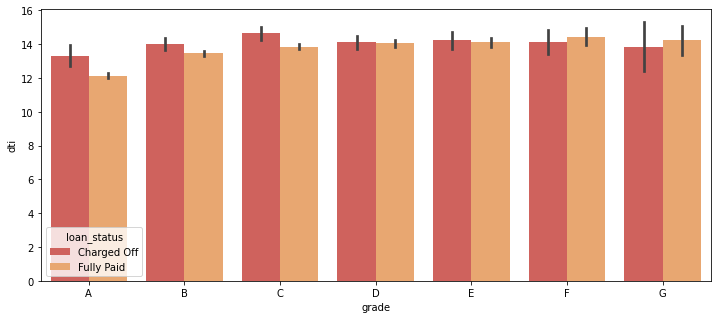

In [156]:
cc4=['loan_amnt','int_rate','installment','annual_inc','dti']
for i in cc4:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='grade', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"),order=['A','B','C','D','E','F','G'])
    plt.show()

<Figure size 1080x648 with 0 Axes>

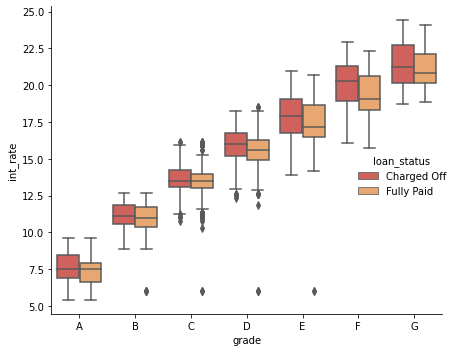

In [157]:
plt.figure(figsize=(15,9))
sns.catplot(df, y ='int_rate', x ='grade',hue ='loan_status', order=['A','B','C','D','E','F','G'],palette=sns.color_palette("Spectral"),kind = 'box')
plt.tight_layout()
plt.show()

**Observations:**
After analyzing the above categorical columns with loan status, the  **loan Charged Off/default** happens when:
1. <mark> Applicants belonging to lower grade (F and G) with higher loan amount.
2. <mark> Interest Rates are higher for applicants belonging to lower grade (F and G)

## Emp-title VS numberical Variables w.r.t Loan status

In [158]:
df_full['emp_title'].value_counts()[df_full['emp_title'].value_counts()>9]

US Army              38
US Postal Service    23
Bank of America      23
Walmart              20
Self Employed        17
US Air Force         15
AT&T                 12
UPS                  11
Verizon              10
Name: emp_title, dtype: int64

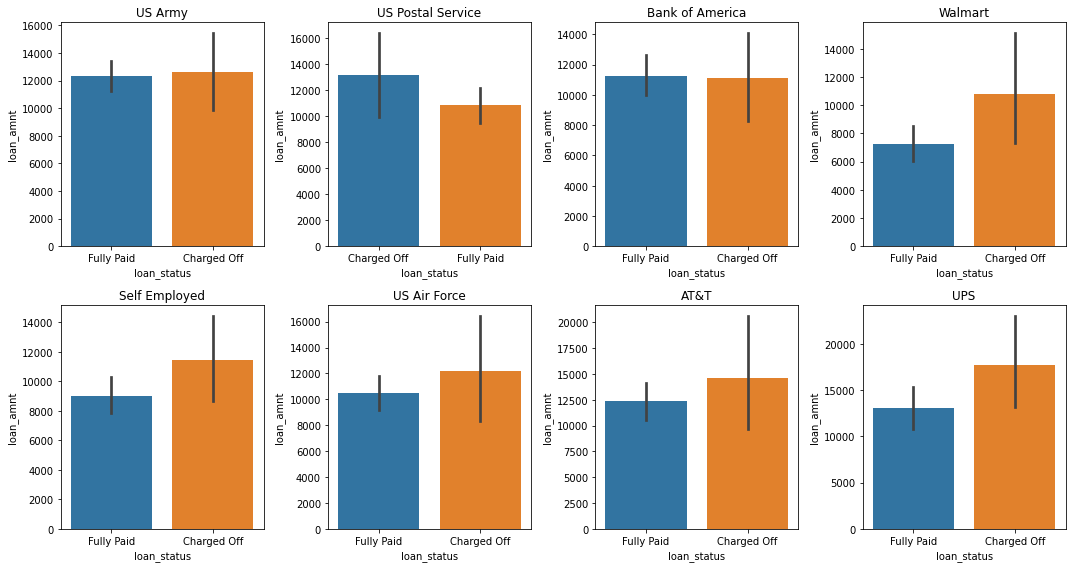

In [159]:
cl=['US Army','US Postal Service','Bank of America','Walmart','Self Employed','US Air Force','AT&T','UPS']
fig, ax = plt.subplots(int(len(cl)/4),4, figsize=(15, 8))
for i in range(len(cl)):
    plt.subplot(int(len(cl)/4),4,i+1)
    sns.barplot(df[df['emp_title']==cl[i]],x='loan_status',y='loan_amnt')
    
    plt.title(cl[i])
plt.tight_layout()
plt.show()

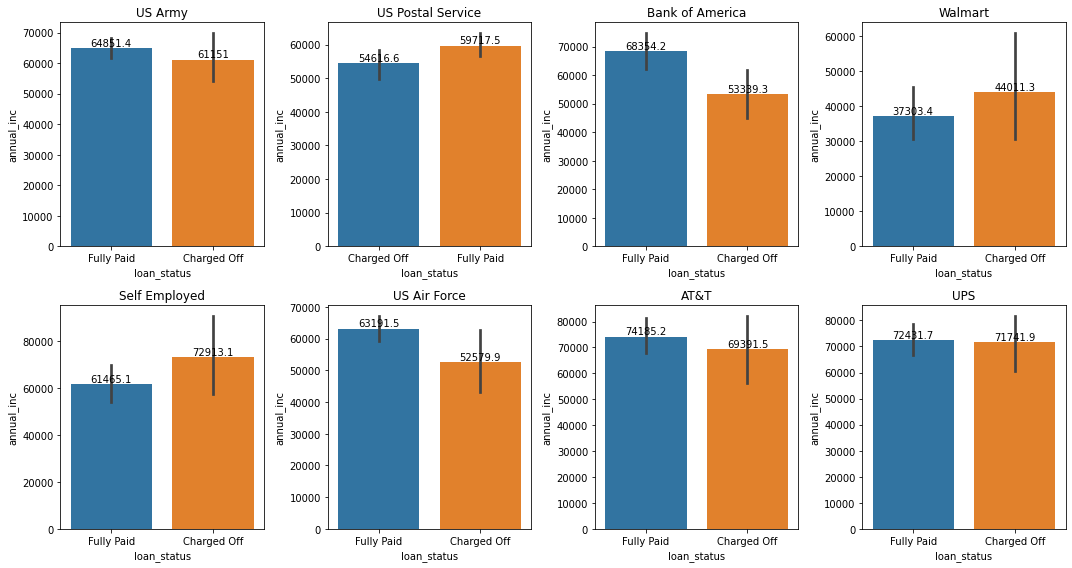

In [160]:
cl=['US Army','US Postal Service','Bank of America','Walmart','Self Employed','US Air Force','AT&T','UPS']
fig, ax = plt.subplots(int(len(cl)/4),4, figsize=(15, 8))
for i in range(len(cl)):
    plt.subplot(int(len(cl)/4),4,i+1)
    f=sns.barplot(df[df['emp_title']==cl[i]],x='loan_status',y='annual_inc')
    for val in f.containers:
        f.bar_label(val)
    plt.title(cl[i])
plt.tight_layout()
plt.show()

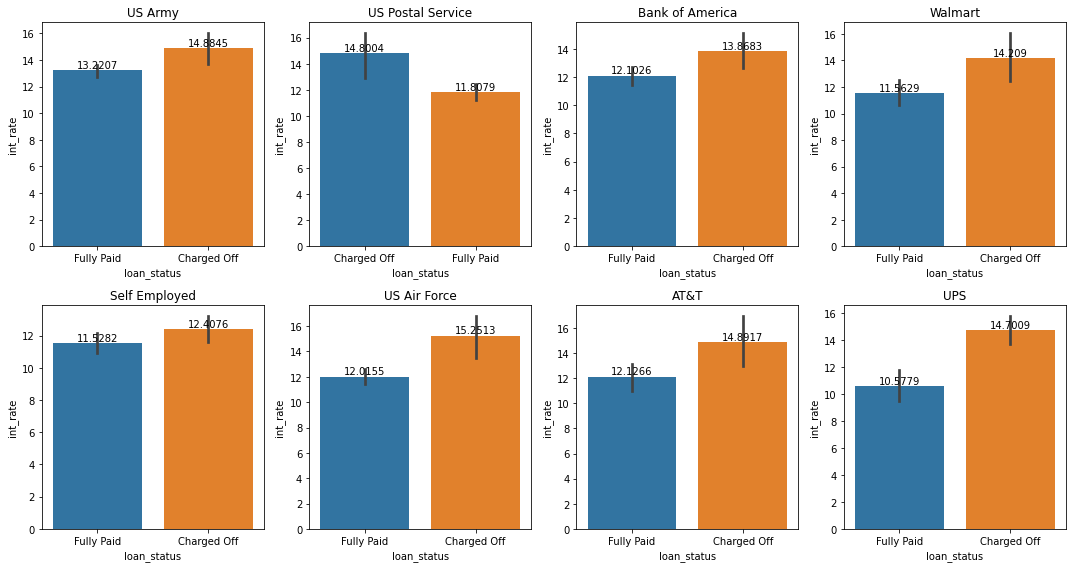

In [161]:
cl=['US Army','US Postal Service','Bank of America','Walmart','Self Employed','US Air Force','AT&T','UPS']
fig, ax = plt.subplots(int(len(cl)/4),4, figsize=(15, 8))
for i in range(len(cl)):
    plt.subplot(int(len(cl)/4),4,i+1)
    f=sns.barplot(df[df['emp_title']==cl[i]],x='loan_status',y='int_rate')
    for val in f.containers:
        f.bar_label(val)
    plt.title(cl[i])
plt.tight_layout()
plt.show()

**Observations:**
The  **loan Charged Off/default** Reasons:
1. <mark> Higher Average Loan amounts for US Army and United Postal Services.   
2. <mark> Applicants who are self employed with higher annual income.
3. <mark> Applicants from US government based organizations like US Army and US Air Force, Walmart, AT&T and UPS having higher interest rates 

## Emp-Length VS numberical Variables w.r.t Loan status

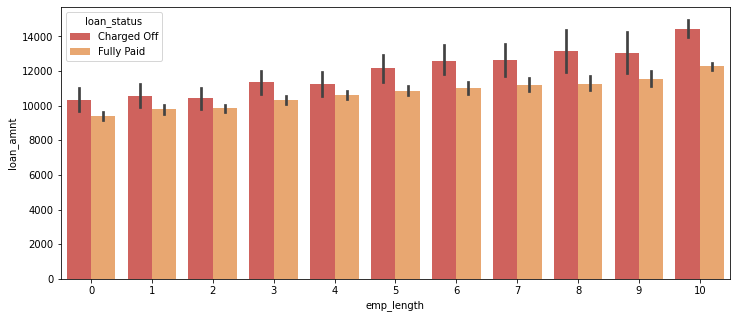

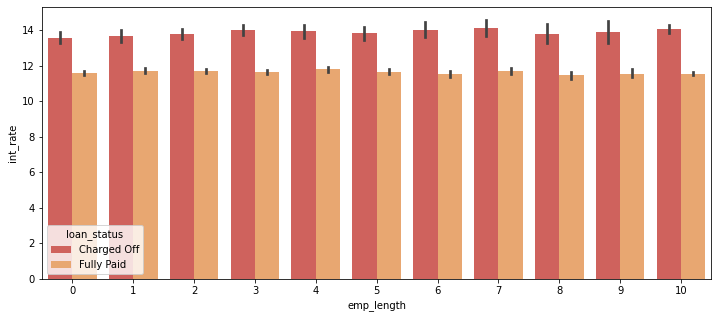

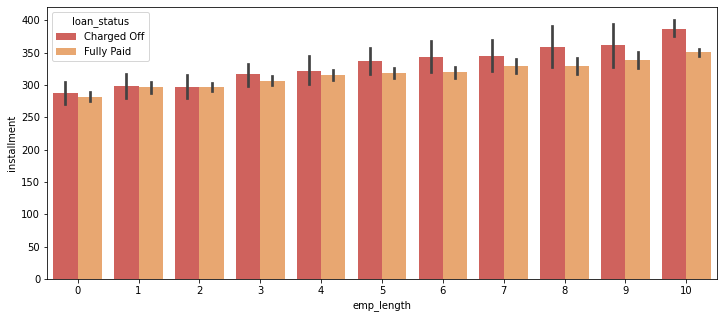

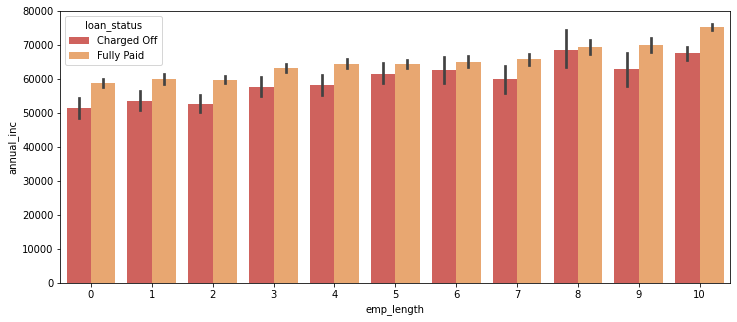

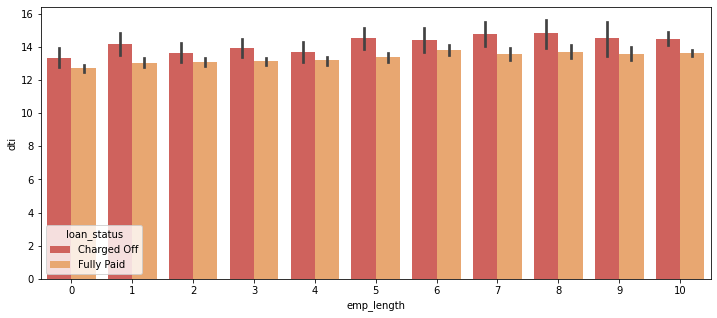

In [162]:
cc=['loan_amnt','int_rate','installment','annual_inc','dti']
for i in cc:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='emp_length', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
The  **loan Charged Off/default** Reasons:
1. <mark> Applicants having more than 10 years of Experience applying for higher Loan amount   
2. <mark> Applicants having 8 years of Experience having higher annual income.
3. <mark> Applicants having 7-8 years of Experience having higher debt-to-income ratio.

## Home Ownership VS numberical Variables w.r.t Loan status

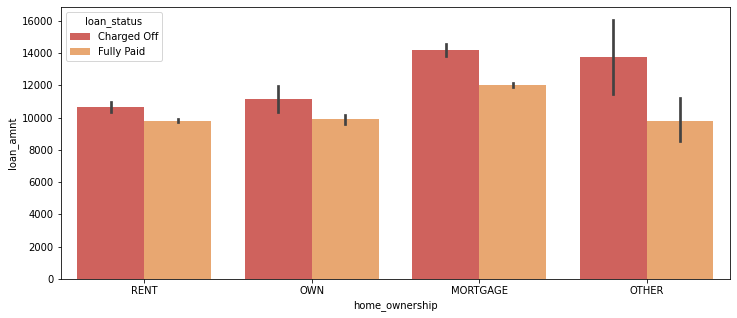

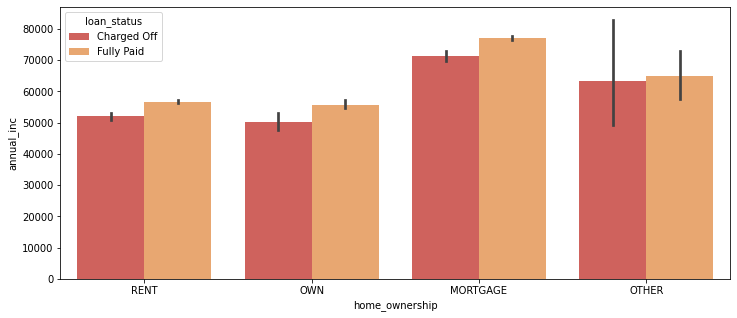

In [163]:
cc=['loan_amnt','annual_inc']
for i in cc:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='home_ownership', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
The  **loan Charged Off/default** Reasons:
1. <mark> Applicants having house/property mortgage and higher average annual income applying higher Loan amounts.   

## Loan Issued Year VS numberical Variables w.r.t Loan status

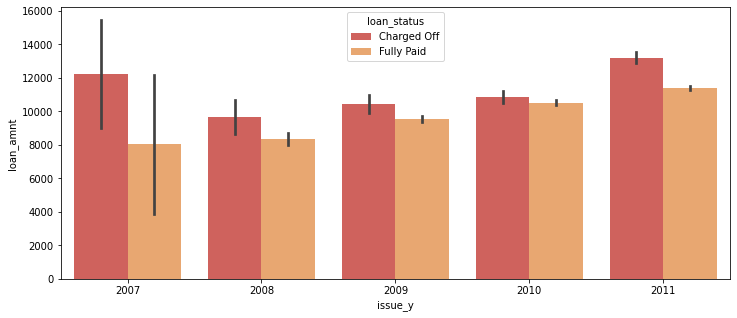

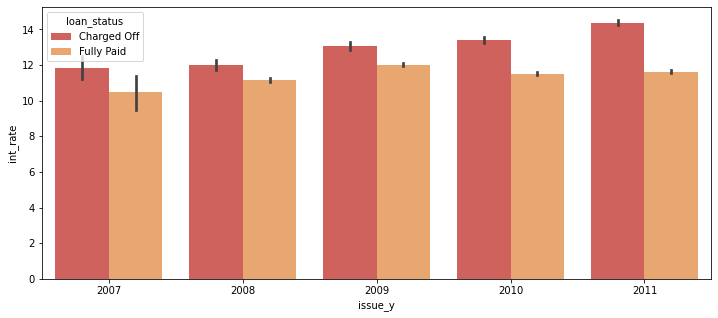

In [164]:
cc=['loan_amnt','int_rate']
for i in cc:
    plt.figure(figsize=(12,5))
    f=sns.barplot(df,x='issue_y', y=i, hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
The  **loan Charged Off/default** Reasons:
1. <mark> Loans with higher average loan amount issued in the year 2011 have high interest rates leading to loan default     

## Purpose VS numberical Variables w.r.t Loan status

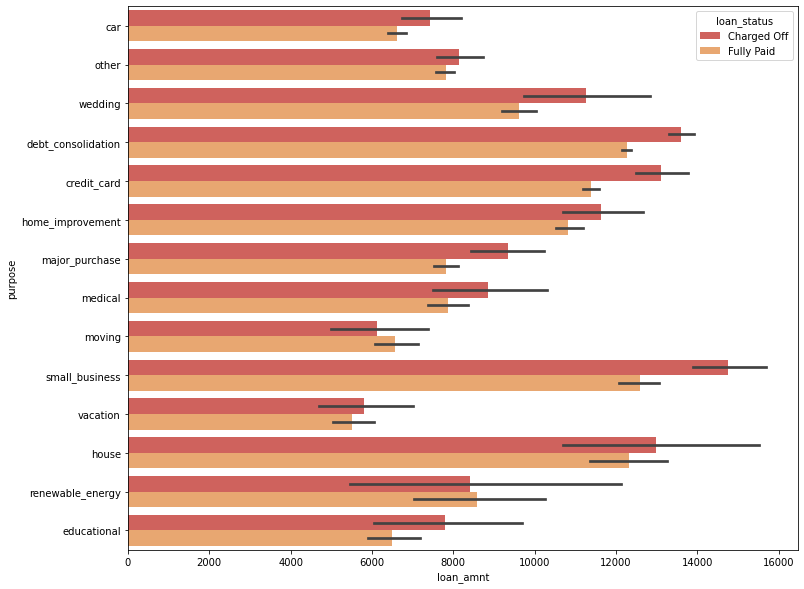

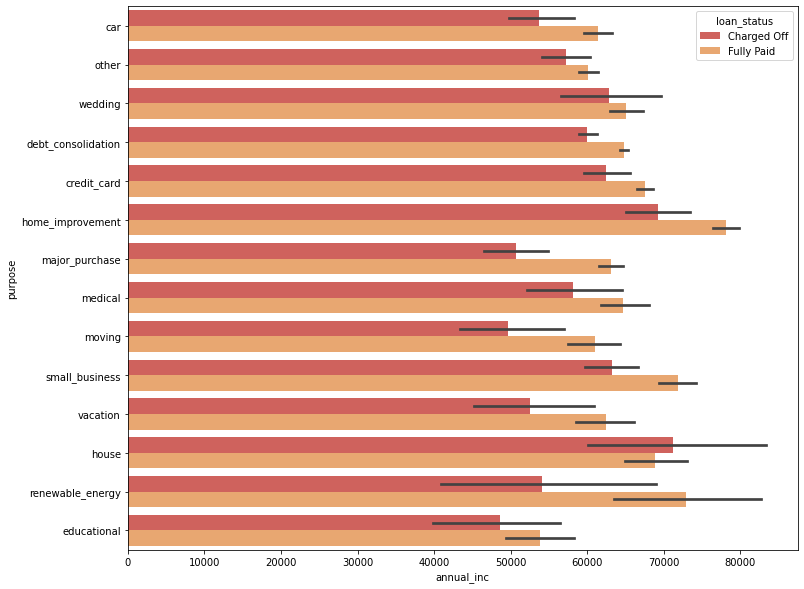

In [178]:
cc=['loan_amnt','annual_inc']
for i in cc:
    plt.figure(figsize=(12,10))
    f=sns.barplot(df,x=i, y='purpose', hue ='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**

The **loans taken were Charged Off/default** for:
1. <mark> Small Business and Debt Consolidation with higher average loan amount
2. <mark> People with annual income in the range 70-80k for house and house improvement    

## State VS numberical Variables w.r.t Loan status

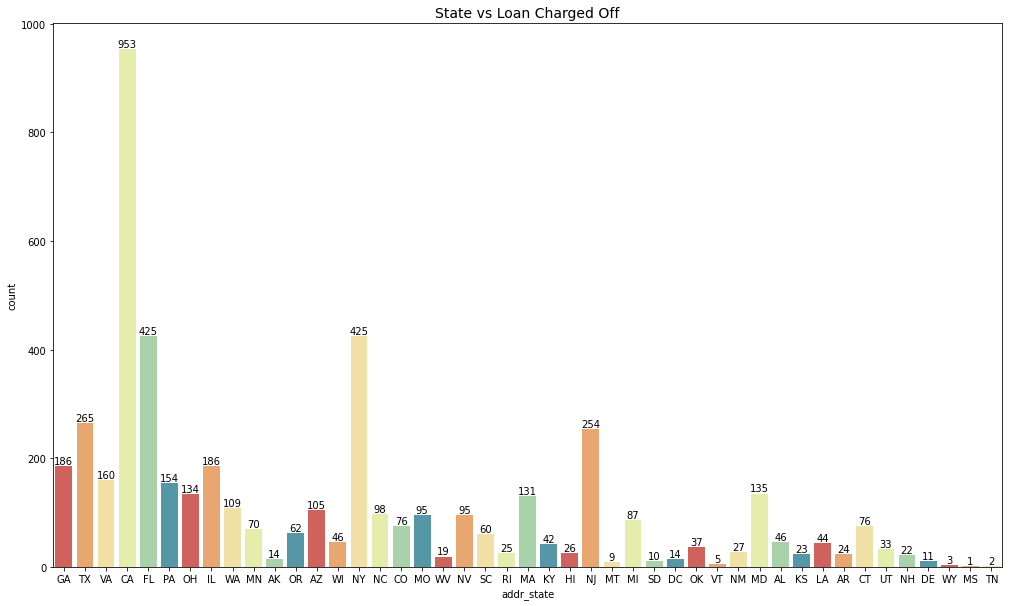

In [166]:
plt.figure(figsize=(17,10))
f=sns.countplot(df_full,x='addr_state',palette=sns.color_palette("Spectral"))
for val in f.containers:
    f.bar_label(val)
plt.title(col_labels['addr_state']+' vs Loan Charged Off',fontsize=14)
plt.show()

**Observations:**
1. <mark> Loan taken by people in California are highly defaulted/charged Off followed by florida and New York  

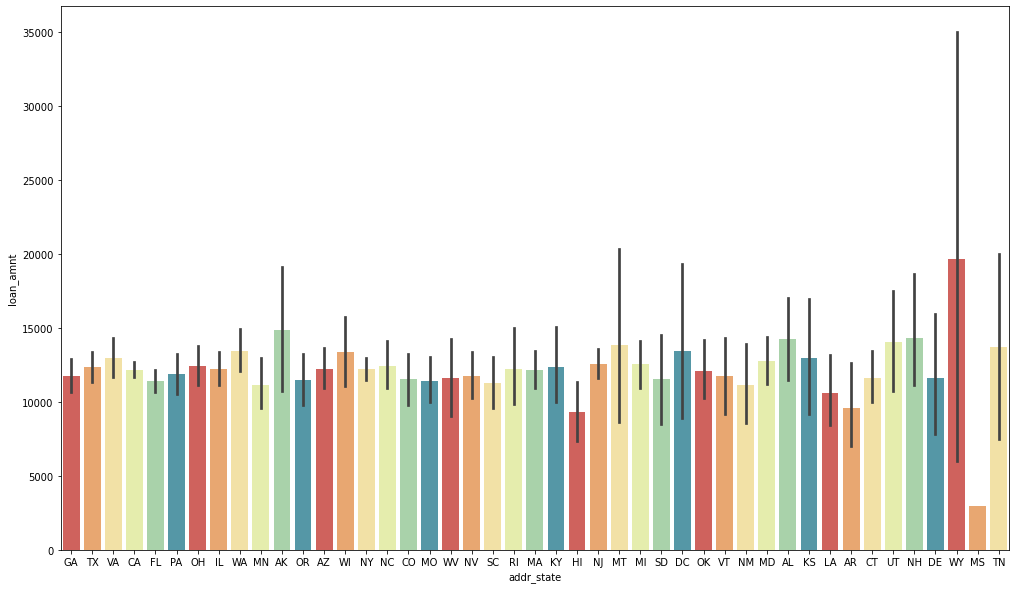

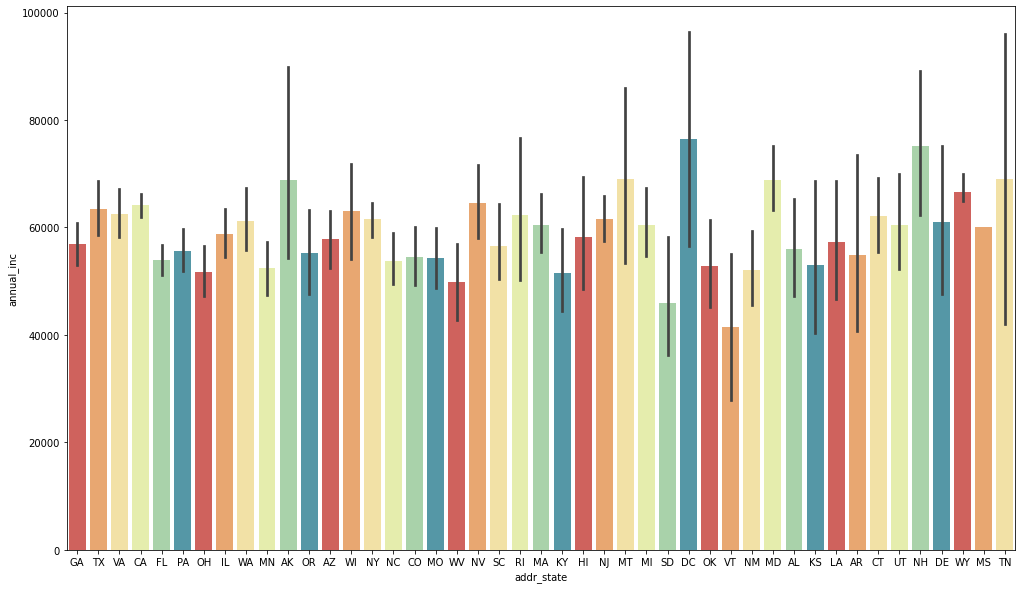

In [167]:
cc=['loan_amnt','annual_inc']
for i in cc:
    plt.figure(figsize=(17,10))
    f=sns.barplot(df_full,x='addr_state', y=i,palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
1. <mark> loans taken by people in Wyoming with higher average loan amount are defaulted.
2. <mark> People in Washington DC and New Hampshire states having higher annual income are defaulted.     

## Delinquency past 2years VS numberical Variables w.r.t Loan status

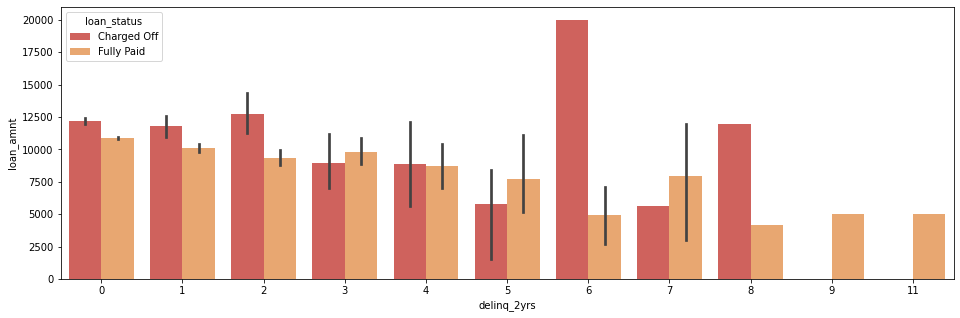

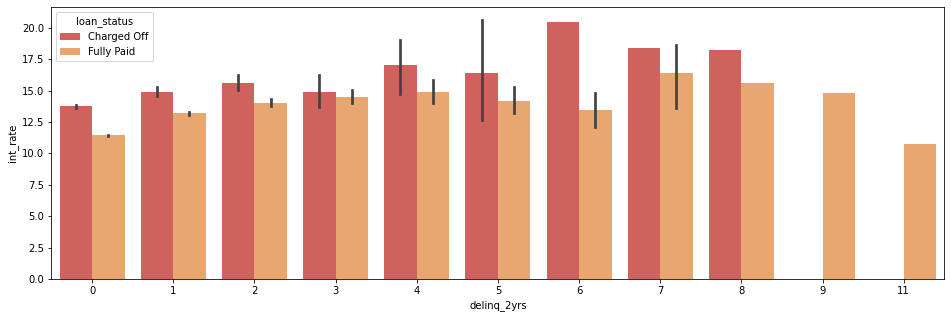

In [168]:
cc=['loan_amnt','int_rate']
for i in cc:
    plt.figure(figsize=(16,5))
    f=sns.barplot(df,x='delinq_2yrs', y=i,hue='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
1. <mark> Borrower with 6 delinquencies in the last 2 years taking higher loan amount with high interest rate resulted in loan default 


## Inquiry Last 6 months VS numberical Variables w.r.t Loan status

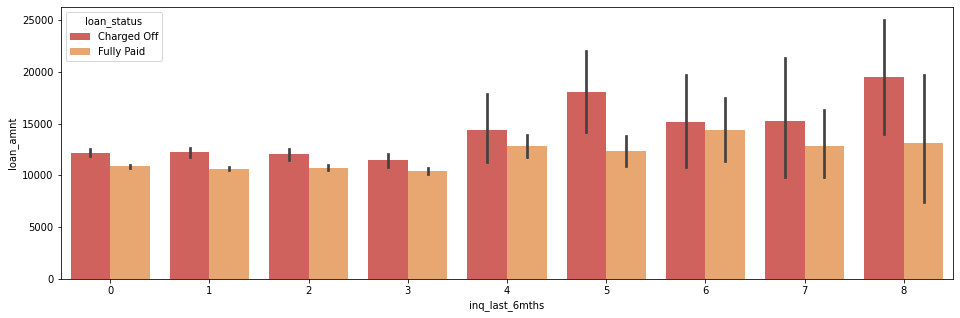

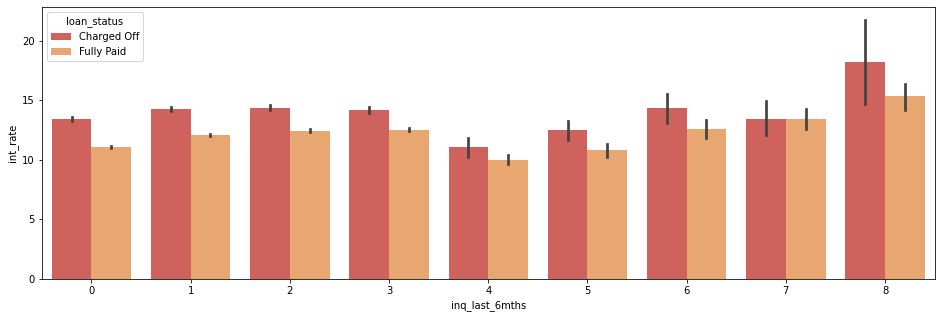

In [170]:
cc=['loan_amnt','int_rate']
for i in cc:
    plt.figure(figsize=(16,5))
    f=sns.barplot(df,x='inq_last_6mths', y=i,hue='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
1. <mark> People with higher number of inquires have low credit score resulting in high interest rates for higher loan amounts 
    have more probability to default the loan      

## Public record bankruptcy  VS numberical Variables w.r.t Loan status

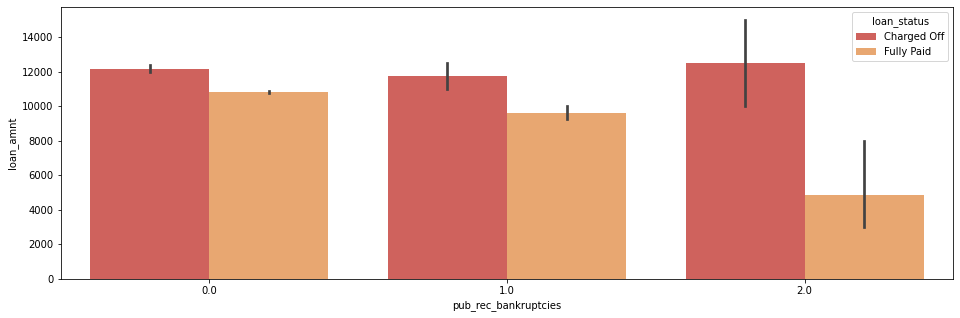

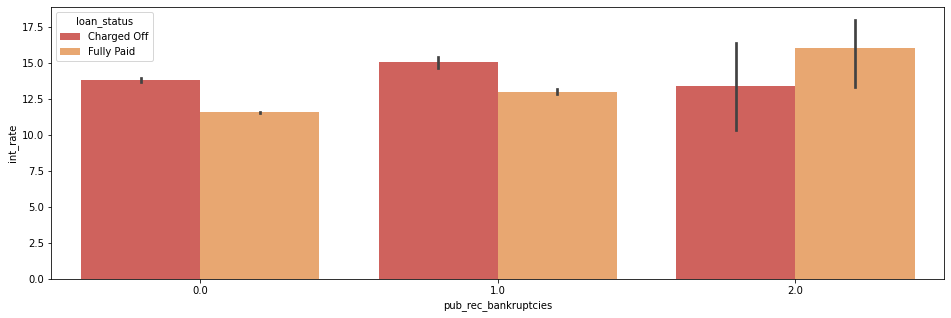

In [171]:
cc=['loan_amnt','int_rate']
for i in cc:
    plt.figure(figsize=(16,5))
    f=sns.barplot(df,x='pub_rec_bankruptcies', y=i,hue='loan_status',palette=sns.color_palette("Spectral"))
    plt.show()

**Observations:**
1. <mark> People with the record of bankruptcy applying for higher loan amount have higher interest rates leading to loan default     

## Categorical VS Catergorical Variables w.r.t Loan status

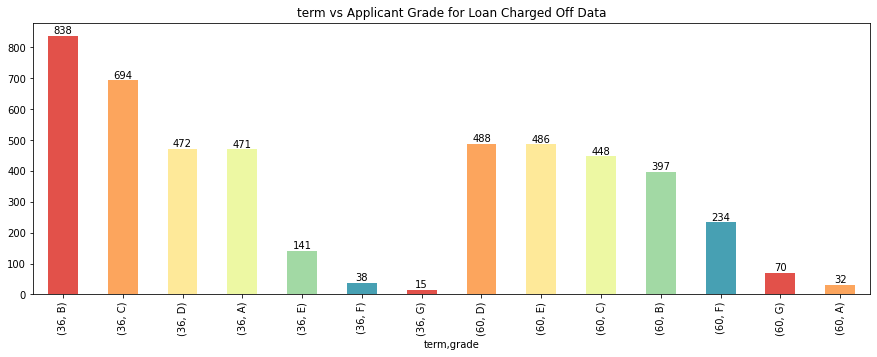

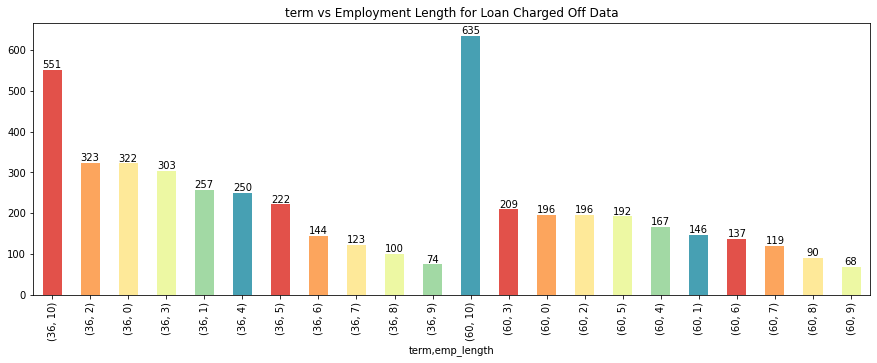

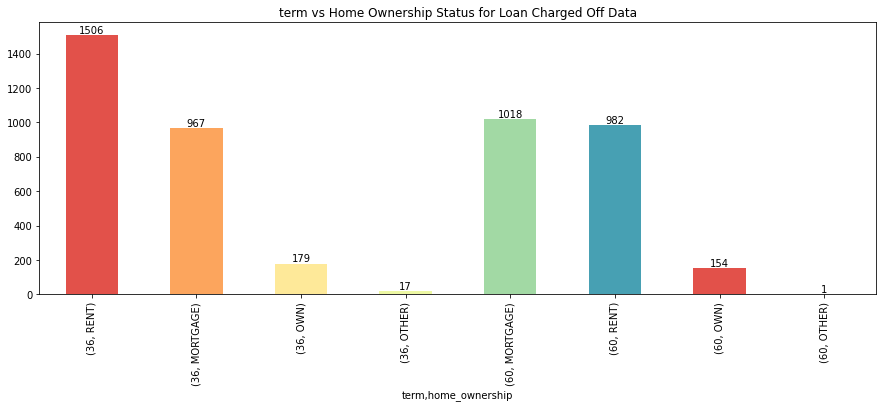

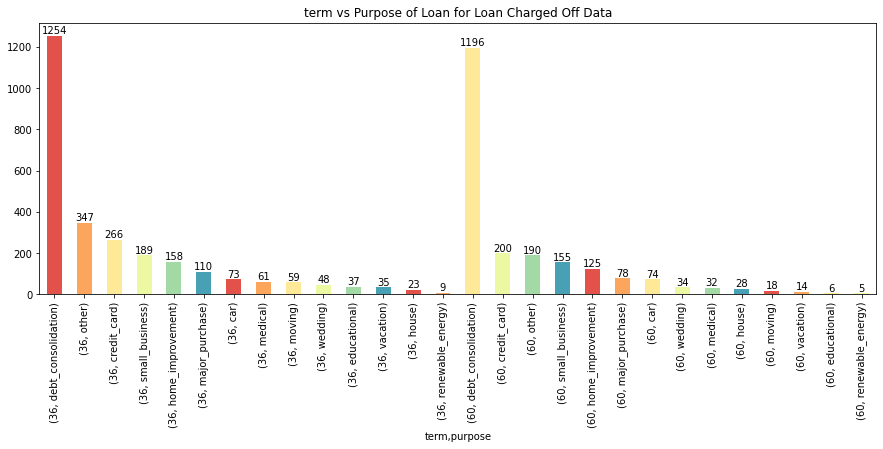

In [172]:
c=['grade','emp_length','home_ownership','purpose']
for i in c:
    plt.figure(figsize=(15,5))
    f=df_full.groupby('term')[i].value_counts().plot.bar(color=sns.color_palette("Spectral"),stacked=True)
    for val in f.containers:
        f.bar_label(val)
    plt.title('term vs '+col_labels[i]+' for Loan Charged Off Data')
    plt.show()

**Observations:**
1. <mark> Loans by people belonging to Grade B with loan term of 3 years are likely to be defaulted 
2. <mark> Loans taken by people with 10+ years of experience having loan term of 5 years are likely to be defaulted
3. <mark> Loans taken by people residing in a rental house gaving loan term of 3 years are likely to be defaulted
4. <mark> Loans for debt consolidation irrespective of the term are likely to be defaulted

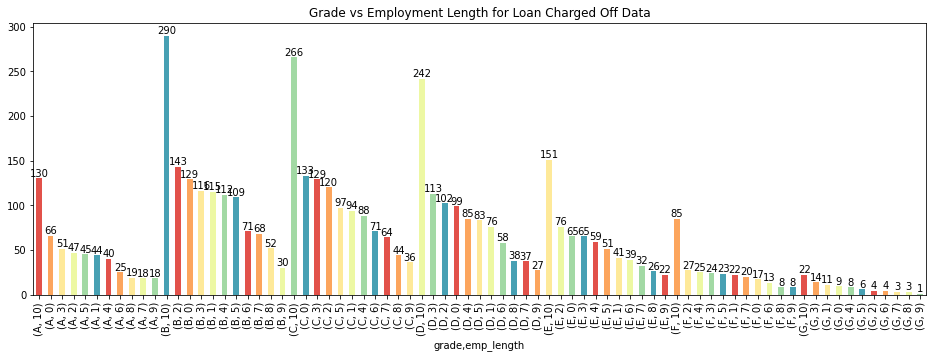

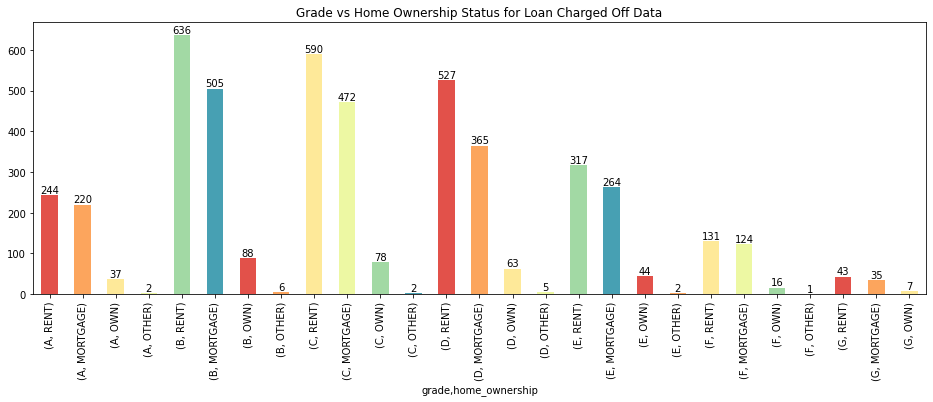

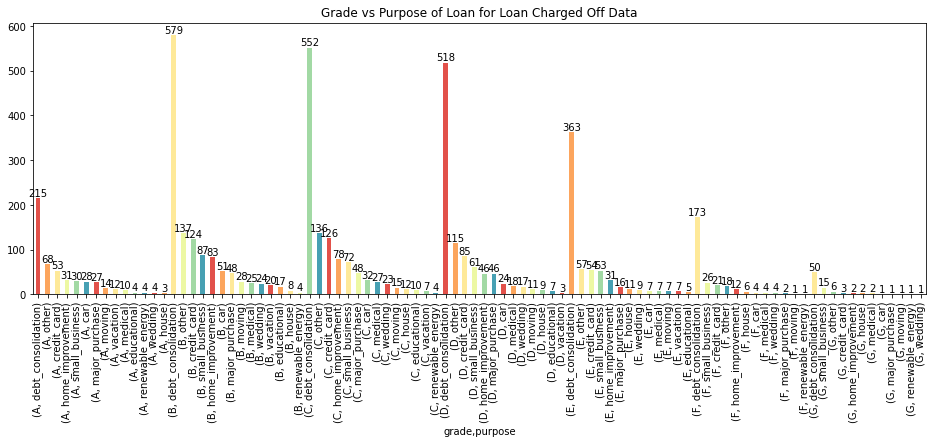

In [173]:
c=['emp_length','home_ownership','purpose']
for i in c:
    plt.figure(figsize=(16,5))
    f=df_full.groupby('grade')[i].value_counts().plot.bar(color=sns.color_palette("Spectral"),stacked=True)
    for val in f.containers:
        f.bar_label(val)
    plt.title('Grade vs '+col_labels[i]+' for Loan Charged Off Data')
    plt.show()

**Observations:**
1. <mark> Loans by people belonging to Grade B,C,D residing in a rental house are likely to be defaulted followed by people having property mortgage in the same grades  

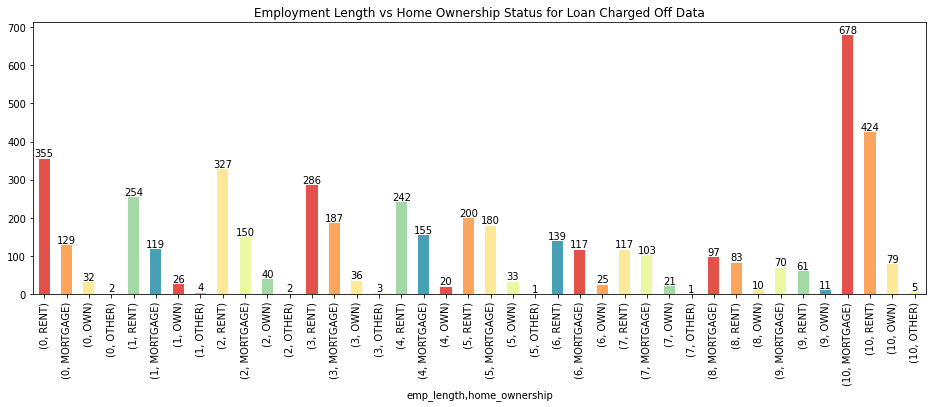

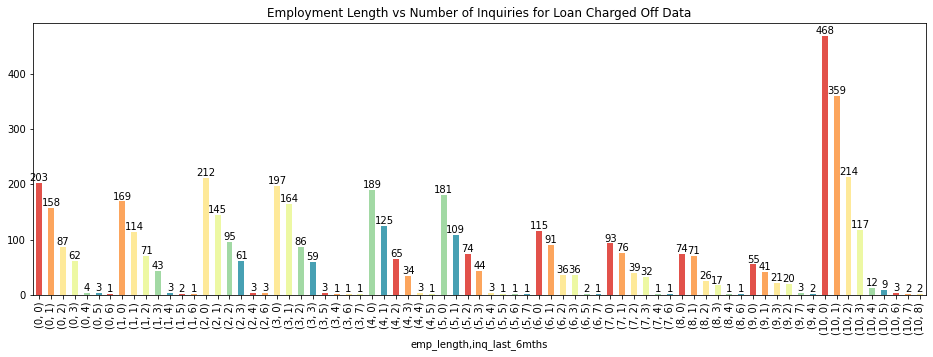

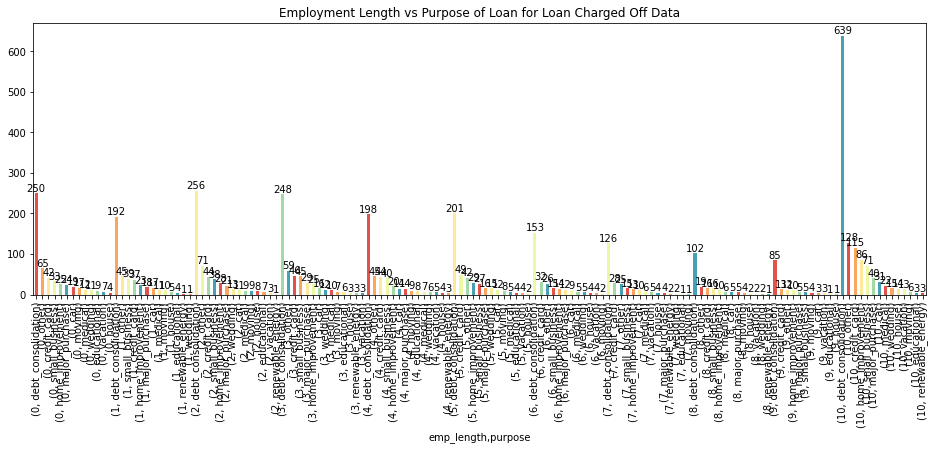

In [174]:
c=['home_ownership','inq_last_6mths','purpose']
for i in c:
    plt.figure(figsize=(16,5))
    f=df_full.groupby('emp_length')[i].value_counts().plot.bar(color=sns.color_palette("Spectral"),stacked=True)
    for val in f.containers:
        f.bar_label(val)
    plt.title(col_labels['emp_length']+' vs '+col_labels[i]+' for Loan Charged Off Data')
    plt.show()

**Observations:**
1. <mark> Maximum number of defaulters have 10+ years of experience with property mortgage followed by Rental housing  
2. <mark> Maximum number of defaulters have 10+ years of experiences and not done any inquiries in the last 6 months
3. <mark> Debt Consolidation is the major reason for loan deafaulting and highest is observed in people having 10+ years of experience

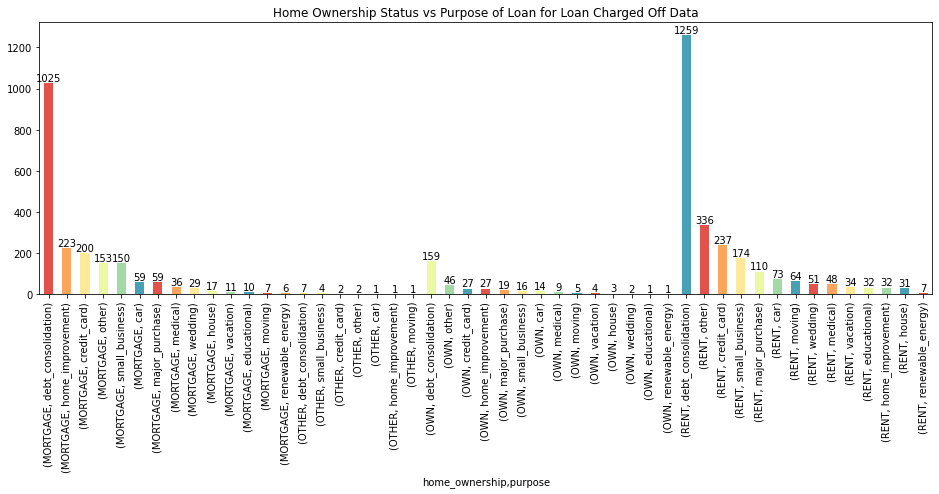

In [175]:
c=['purpose']
for i in c:
    plt.figure(figsize=(16,5))
    f=df_full.groupby('home_ownership')[i].value_counts().plot.bar(color=sns.color_palette("Spectral"),stacked=True)
    for val in f.containers:
        f.bar_label(val)
    plt.title(col_labels['home_ownership']+' vs '+col_labels[i]+' for Loan Charged Off Data')
    plt.show()

**Observations:**
1. <mark> Debt Consolidation is the major reason for loan defaulting by people residing in a rental house followed by people with property mortgage 

<Axes: xlabel='int_rate_cat', ylabel='annual_inc_cat'>

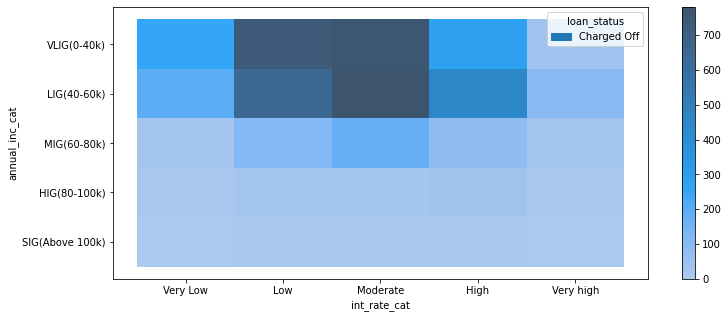

In [176]:
plt.figure(figsize=(12,5))
sns.histplot(df_full,x='int_rate_cat',y='annual_inc_cat',hue='loan_status',cbar=True, )

**Observations:**
1. <mark> people belonging to VLIG and LIG having moderate interest rates are highly defaulted

## 4.4 Correlation Analysis

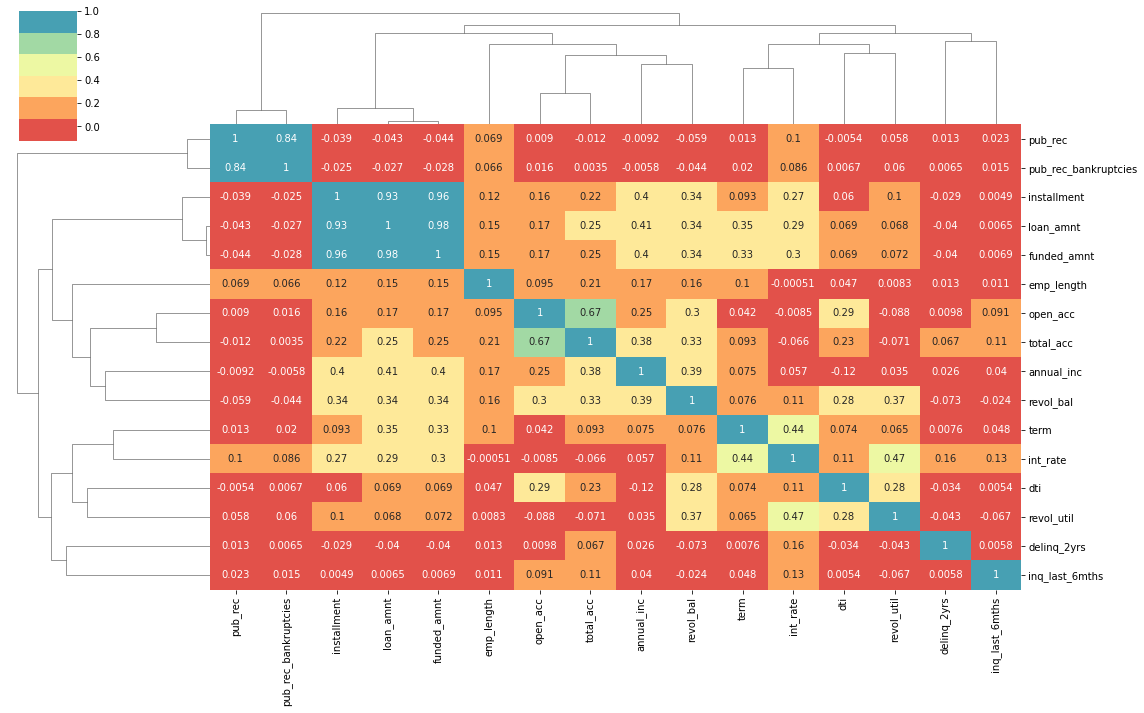

In [177]:
c_d=['grade','sub_grade', 'emp_title', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose',
    'addr_state','issue_m', 'issue_y', 'loan_amnt_cat','funded_amnt_cat', 'int_rate_cat', 'annual_inc_cat', 'dti_cat']
df_c=df.drop(c_d,axis=1)
sns.clustermap(df_c.corr(), annot=True, figsize=(16, 10),cmap=sns.color_palette("Spectral"))
plt.show()

**Observations:**
1. <mark> Correlation between Interest rate and revolving line utilization rate is 0.47, which indicates that Lending club is charging higher interest rates for riskier loan applicant
2. <mark> Correlation between loan amount and credit Revolving Balance is 0.35, which indicates that higher lending club is approving higher amount loans for applicants with higher credit revolving balance (Risk)  

## Major Observations found in EDA of Lending Club Study:

1. <mark> Higher loan amount leads to loan default/charged off.
2. <mark> Interest rate is always high for the loans which are defaulted irrespective of the loan amount
3. <mark> Higher Debt-to-Income Ratio leads to Loan default/charged off.
4. <mark> Relatively lower Annual income of people from all the grades resulted in loan default.
5. <mark> Higher DTI is observed in people from grade C
6. <mark> loans taken for Debt Consolidation and Small Business with higher average loan amount and high Interest rates defaulted more
7. <mark> Most loans which are defaulted have higher loan amounts with higher Interest-rates and are taken by people who belong to Medium Income Group, High Income Group and Supeior Income Group
8. <mark> VLIG and LIG groups with higher DTI  and interest rates defaulted more
9. <mark> Higher loan amounts with high interest rates by people from grade E, F and G resulted in loan default
10. <mark> People with higher number of inquires have low credit score resulting in high interest rates for higher loan amounts have more probability to default the loan
11.	<mark> Higher Average Loan amounts with high interest rates to people from US based organizations like US Army, US Airforce and United Postal Services resulted in loan default.  
12.	<mark> Loans by people belonging to Grade B with loan term of 3 years are likely to be defaulted
13. <mark> People with higher number of inquires have low credit score resulting in high interest rates for higher loan amounts have more probability to default the loan
14. <mark> Borrowers with 6 delinquencies in the last 2 years taking higher loan amount with high interest rate resulted in loan default
15. <mark> Highest number of loan defaults is observed in people with 10+ years of experience
16. <mark> Maximum number of defaulters have 10+ years of experience with property mortgage followed by Rental housing
14. <mark> Maximum  number of loans are defaulted in the year 2011 and in the month of december.
15. <mark> Interest rates kept increasing in the years 2010 and 2011, which resulted in loan default. 
16. <mark> Loans which are verified have defaulted more compared to loans which are not verified.
17. <mark> Correlation between Interest rate and revolving line utilization rate is 0.47, which indicates that Lending club is charging higher interest rates for riskier loan applicant
18. <mark> Correlation between loan amount and credit Revolving Balance is 0.35, which indicates that lending club is approving higher amount loans for applicants with higher credit revolving balance (Risk)

### More defaults due to higher loan amounts and increasing interest rates in the year 2011 is mainly due to **2011 U.S. Debt Ceiling Crisis**